# Time Series Prediction with LSTM Recurrent Neural Networks
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
Deep Learning with Python: Jason Brownlee, Page 195-210 of 255

# LSTM Network For Regression

Epoch 1/100
95/95 - 4s - loss: 0.0420 - 4s/epoch - 41ms/step
Epoch 2/100
95/95 - 0s - loss: 0.0213 - 278ms/epoch - 3ms/step
Epoch 3/100
95/95 - 0s - loss: 0.0156 - 220ms/epoch - 2ms/step
Epoch 4/100
95/95 - 0s - loss: 0.0142 - 260ms/epoch - 3ms/step
Epoch 5/100
95/95 - 0s - loss: 0.0135 - 266ms/epoch - 3ms/step
Epoch 6/100
95/95 - 0s - loss: 0.0126 - 255ms/epoch - 3ms/step
Epoch 7/100
95/95 - 0s - loss: 0.0117 - 232ms/epoch - 2ms/step
Epoch 8/100
95/95 - 0s - loss: 0.0108 - 225ms/epoch - 2ms/step
Epoch 9/100
95/95 - 0s - loss: 0.0100 - 236ms/epoch - 2ms/step
Epoch 10/100
95/95 - 0s - loss: 0.0090 - 237ms/epoch - 2ms/step
Epoch 11/100
95/95 - 0s - loss: 0.0080 - 299ms/epoch - 3ms/step
Epoch 12/100
95/95 - 0s - loss: 0.0071 - 237ms/epoch - 2ms/step
Epoch 13/100
95/95 - 0s - loss: 0.0063 - 224ms/epoch - 2ms/step
Epoch 14/100
95/95 - 0s - loss: 0.0055 - 278ms/epoch - 3ms/step
Epoch 15/100
95/95 - 0s - loss: 0.0047 - 240ms/epoch - 3ms/step
Epoch 16/100
95/95 - 0s - loss: 0.0041 - 233ms/epoc

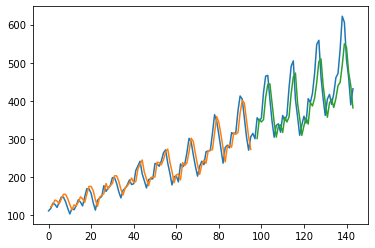




Execution (importing modules) took: 0:00:50 secs (Wall clock time)





In [1]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# LSTM for Regression Using the Window Method

Epoch 1/100
93/93 - 4s - loss: 0.0183 - 4s/epoch - 39ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0079 - 230ms/epoch - 2ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0069 - 254ms/epoch - 3ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0064 - 252ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0061 - 232ms/epoch - 2ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0056 - 253ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0055 - 251ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0052 - 229ms/epoch - 2ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0050 - 256ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0048 - 233ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0047 - 246ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0047 - 235ms/epoch - 3ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0044 - 224ms/epoch - 2ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0046 - 236ms/epoch - 3ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0043 - 256ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0041 - 266ms/epoc

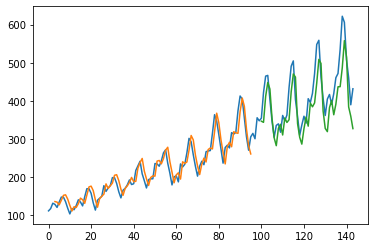




Execution (importing modules) took: 0:00:30 secs (Wall clock time)





In [2]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Lets run again changing the look_back to 12 

Epoch 1/100
84/84 - 4s - loss: 0.0431 - 4s/epoch - 43ms/step
Epoch 2/100
84/84 - 0s - loss: 0.0078 - 255ms/epoch - 3ms/step
Epoch 3/100
84/84 - 0s - loss: 0.0052 - 243ms/epoch - 3ms/step
Epoch 4/100
84/84 - 0s - loss: 0.0044 - 236ms/epoch - 3ms/step
Epoch 5/100
84/84 - 0s - loss: 0.0039 - 235ms/epoch - 3ms/step
Epoch 6/100
84/84 - 0s - loss: 0.0034 - 243ms/epoch - 3ms/step
Epoch 7/100
84/84 - 0s - loss: 0.0033 - 244ms/epoch - 3ms/step
Epoch 8/100
84/84 - 0s - loss: 0.0028 - 225ms/epoch - 3ms/step
Epoch 9/100
84/84 - 0s - loss: 0.0026 - 217ms/epoch - 3ms/step
Epoch 10/100
84/84 - 0s - loss: 0.0023 - 257ms/epoch - 3ms/step
Epoch 11/100
84/84 - 0s - loss: 0.0022 - 233ms/epoch - 3ms/step
Epoch 12/100
84/84 - 0s - loss: 0.0019 - 204ms/epoch - 2ms/step
Epoch 13/100
84/84 - 0s - loss: 0.0018 - 216ms/epoch - 3ms/step
Epoch 14/100
84/84 - 0s - loss: 0.0017 - 235ms/epoch - 3ms/step
Epoch 15/100
84/84 - 0s - loss: 0.0015 - 205ms/epoch - 2ms/step
Epoch 16/100
84/84 - 0s - loss: 0.0013 - 212ms/epoc

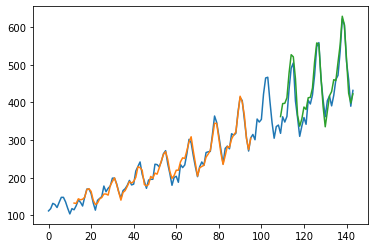




Execution (importing modules) took: 0:00:28 secs (Wall clock time)





In [3]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# LSTM for Regression with Time Steps

Epoch 1/100
93/93 - 4s - loss: 0.0436 - 4s/epoch - 43ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0187 - 276ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0149 - 282ms/epoch - 3ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0133 - 260ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0121 - 301ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0104 - 279ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0090 - 274ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0077 - 270ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0065 - 272ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0056 - 262ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0049 - 311ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0049 - 281ms/epoch - 3ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0042 - 265ms/epoch - 3ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0048 - 270ms/epoch - 3ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0042 - 281ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0041 - 287ms/epoc

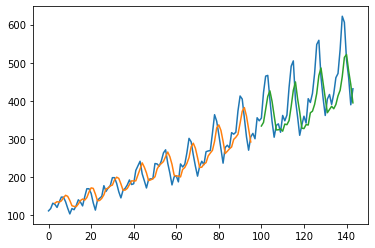




Execution (importing modules) took: 0:00:38 secs (Wall clock time)





In [4]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Lets run again changing the look_back to 12

Epoch 1/100
84/84 - 4s - loss: 0.0831 - 4s/epoch - 50ms/step
Epoch 2/100
84/84 - 0s - loss: 0.0345 - 464ms/epoch - 6ms/step
Epoch 3/100
84/84 - 0s - loss: 0.0229 - 402ms/epoch - 5ms/step
Epoch 4/100
84/84 - 0s - loss: 0.0204 - 444ms/epoch - 5ms/step
Epoch 5/100
84/84 - 0s - loss: 0.0189 - 414ms/epoch - 5ms/step
Epoch 6/100
84/84 - 0s - loss: 0.0176 - 414ms/epoch - 5ms/step
Epoch 7/100
84/84 - 0s - loss: 0.0164 - 454ms/epoch - 5ms/step
Epoch 8/100
84/84 - 0s - loss: 0.0152 - 409ms/epoch - 5ms/step
Epoch 9/100
84/84 - 0s - loss: 0.0138 - 489ms/epoch - 6ms/step
Epoch 10/100
84/84 - 0s - loss: 0.0127 - 421ms/epoch - 5ms/step
Epoch 11/100
84/84 - 0s - loss: 0.0114 - 442ms/epoch - 5ms/step
Epoch 12/100
84/84 - 0s - loss: 0.0100 - 431ms/epoch - 5ms/step
Epoch 13/100
84/84 - 0s - loss: 0.0085 - 455ms/epoch - 5ms/step
Epoch 14/100
84/84 - 0s - loss: 0.0069 - 401ms/epoch - 5ms/step
Epoch 15/100
84/84 - 1s - loss: 0.0056 - 560ms/epoch - 7ms/step
Epoch 16/100
84/84 - 0s - loss: 0.0046 - 428ms/epoc

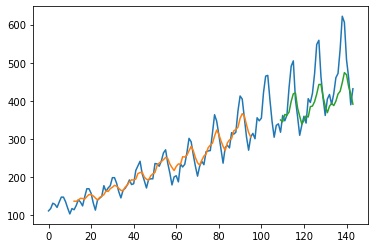




Execution (importing modules) took: 0:00:52 secs (Wall clock time)





In [5]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with time step regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# LSTM with Memory Between Batches

93/93 - 4s - loss: 0.0076 - 4s/epoch - 44ms/step
93/93 - 0s - loss: 0.0153 - 304ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0107 - 335ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0086 - 390ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0072 - 300ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0062 - 308ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0056 - 278ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0052 - 278ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0050 - 295ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0048 - 378ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0047 - 301ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0046 - 299ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0045 - 260ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0045 - 395ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0044 - 351ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0043 - 319ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0042 - 338ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0042 - 322ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0041 - 310ms/epoch - 3ms/step
93/93 - 0s - loss: 0.0041 - 390ms

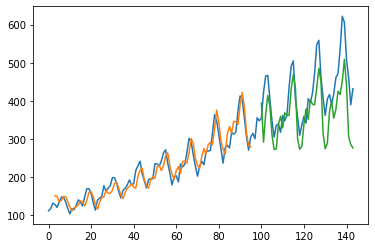




Execution (importing modules) took: 0:00:57 secs (Wall clock time)





In [6]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

84/84 - 4s - loss: 0.0047 - 4s/epoch - 45ms/step
84/84 - 0s - loss: 0.0059 - 426ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0047 - 424ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0044 - 410ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0044 - 417ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0044 - 419ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0044 - 418ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0043 - 430ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0043 - 391ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0042 - 407ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0042 - 397ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0042 - 381ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0041 - 438ms/epoch - 5ms/step
84/84 - 1s - loss: 0.0041 - 527ms/epoch - 6ms/step
84/84 - 0s - loss: 0.0041 - 457ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0040 - 405ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0040 - 451ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0040 - 432ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0040 - 454ms/epoch - 5ms/step
84/84 - 0s - loss: 0.0040 - 421ms

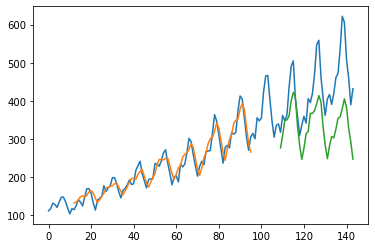




Execution (importing modules) took: 0:01:00 secs (Wall clock time)





In [7]:
import time
from datetime import timedelta

start_time = time.time()

# LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Stacked LSTMs with Memory Between Batches

93/93 - 6s - loss: 0.0044 - 6s/epoch - 65ms/step
93/93 - 0s - loss: 0.0151 - 459ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0111 - 386ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0087 - 455ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0072 - 484ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0064 - 465ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0060 - 419ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0057 - 449ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0055 - 451ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0054 - 489ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0053 - 459ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0053 - 418ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0052 - 420ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0052 - 418ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0051 - 491ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0051 - 401ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0050 - 397ms/epoch - 4ms/step
93/93 - 0s - loss: 0.0050 - 422ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0050 - 420ms/epoch - 5ms/step
93/93 - 0s - loss: 0.0049 - 402ms

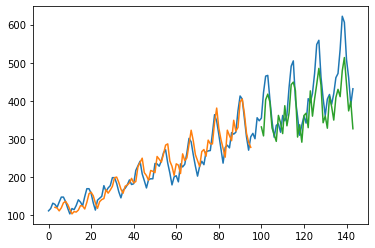




Execution (importing modules) took: 0:01:04 secs (Wall clock time)





In [8]:
import time
from datetime import timedelta

start_time = time.time()

# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

90/90 - 12s - loss: 0.0056 - 12s/epoch - 136ms/step
90/90 - 1s - loss: 0.0074 - 633ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0069 - 688ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0066 - 618ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0063 - 652ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0062 - 645ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0061 - 627ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0060 - 715ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0059 - 662ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0059 - 653ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0058 - 638ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0058 - 649ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0057 - 708ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0057 - 717ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0056 - 646ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0055 - 641ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0055 - 636ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0054 - 653ms/epoch - 7ms/step
90/90 - 1s - loss: 0.0053 - 676ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0051 - 67

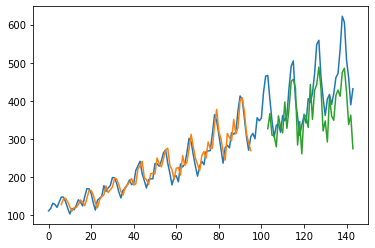




Execution (importing modules) took: 0:01:52 secs (Wall clock time)





In [12]:
import time
from datetime import timedelta

start_time = time.time()

# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

90/90 - 10s - loss: 0.0051 - 10s/epoch - 115ms/step
90/90 - 1s - loss: 0.0152 - 814ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0106 - 813ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0075 - 832ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0069 - 729ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0068 - 743ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0069 - 738ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0069 - 731ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0069 - 734ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0069 - 855ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0069 - 858ms/epoch - 10ms/step
90/90 - 1s - loss: 0.0068 - 782ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0068 - 767ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0068 - 755ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0068 - 798ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0068 - 749ms/epoch - 8ms/step
90/90 - 1s - loss: 0.0068 - 770ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0068 - 798ms/epoch - 9ms/step
90/90 - 1s - loss: 0.0068 - 898ms/epoch - 10ms/step
90/90 - 1s - loss: 0.0068 - 

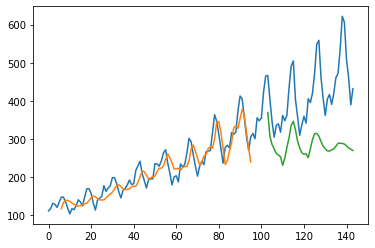




Execution (importing modules) took: 0:01:37 secs (Wall clock time)





In [11]:
import time
from datetime import timedelta

start_time = time.time()

# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

# Lets try the simple twice stacked model with more epochs

Epoch 1/100
93/93 - 5s - loss: 0.0056 - 5s/epoch - 49ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0279 - 307ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0212 - 355ms/epoch - 4ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0184 - 343ms/epoch - 4ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0161 - 317ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0138 - 322ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0118 - 341ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0103 - 321ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0094 - 322ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0087 - 317ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0083 - 401ms/epoch - 4ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0079 - 350ms/epoch - 4ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0076 - 333ms/epoch - 4ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0073 - 417ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0071 - 408ms/epoch - 4ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0069 - 371ms/epoc

Epoch 30/100
93/93 - 0s - loss: 0.0016 - 324ms/epoch - 3ms/step
Epoch 31/100
93/93 - 0s - loss: 0.0016 - 310ms/epoch - 3ms/step
Epoch 32/100
93/93 - 0s - loss: 0.0016 - 312ms/epoch - 3ms/step
Epoch 33/100
93/93 - 0s - loss: 0.0016 - 333ms/epoch - 4ms/step
Epoch 34/100
93/93 - 0s - loss: 0.0016 - 319ms/epoch - 3ms/step
Epoch 35/100
93/93 - 0s - loss: 0.0016 - 316ms/epoch - 3ms/step
Epoch 36/100
93/93 - 0s - loss: 0.0016 - 320ms/epoch - 3ms/step
Epoch 37/100
93/93 - 0s - loss: 0.0016 - 330ms/epoch - 4ms/step
Epoch 38/100
93/93 - 0s - loss: 0.0016 - 317ms/epoch - 3ms/step
Epoch 39/100
93/93 - 0s - loss: 0.0016 - 329ms/epoch - 4ms/step
Epoch 40/100
93/93 - 0s - loss: 0.0016 - 338ms/epoch - 4ms/step
Epoch 41/100
93/93 - 0s - loss: 0.0016 - 338ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 0.0016 - 335ms/epoch - 4ms/step
Epoch 43/100
93/93 - 0s - loss: 0.0016 - 308ms/epoch - 3ms/step
Epoch 44/100
93/93 - 0s - loss: 0.0016 - 336ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 0.0016 -

93/93 - 0s - loss: 0.0017 - 210ms/epoch - 2ms/step
Epoch 59/100
93/93 - 0s - loss: 0.0019 - 208ms/epoch - 2ms/step
Epoch 60/100
93/93 - 0s - loss: 0.0014 - 189ms/epoch - 2ms/step
Epoch 61/100
93/93 - 0s - loss: 0.0017 - 199ms/epoch - 2ms/step
Epoch 62/100
93/93 - 0s - loss: 0.0017 - 197ms/epoch - 2ms/step
Epoch 63/100
93/93 - 0s - loss: 0.0015 - 179ms/epoch - 2ms/step
Epoch 64/100
93/93 - 0s - loss: 0.0019 - 172ms/epoch - 2ms/step
Epoch 65/100
93/93 - 0s - loss: 0.0014 - 203ms/epoch - 2ms/step
Epoch 66/100
93/93 - 0s - loss: 0.0017 - 198ms/epoch - 2ms/step
Epoch 67/100
93/93 - 0s - loss: 0.0016 - 203ms/epoch - 2ms/step
Epoch 68/100
93/93 - 0s - loss: 0.0016 - 189ms/epoch - 2ms/step
Epoch 69/100
93/93 - 0s - loss: 0.0014 - 177ms/epoch - 2ms/step
Epoch 70/100
93/93 - 0s - loss: 0.0017 - 194ms/epoch - 2ms/step
Epoch 71/100
93/93 - 0s - loss: 0.0014 - 278ms/epoch - 3ms/step
Epoch 72/100
93/93 - 0s - loss: 0.0017 - 308ms/epoch - 3ms/step
Epoch 73/100
93/93 - 0s - loss: 0.0016 - 371ms/epoch 

Epoch 87/100
93/93 - 0s - loss: 0.0015 - 350ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 0.0014 - 344ms/epoch - 4ms/step
Epoch 89/100
93/93 - 0s - loss: 0.0014 - 325ms/epoch - 3ms/step
Epoch 90/100
93/93 - 0s - loss: 0.0014 - 344ms/epoch - 4ms/step
Epoch 91/100
93/93 - 0s - loss: 0.0017 - 372ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 0.0016 - 431ms/epoch - 5ms/step
Epoch 93/100
93/93 - 0s - loss: 0.0016 - 359ms/epoch - 4ms/step
Epoch 94/100
93/93 - 0s - loss: 0.0016 - 374ms/epoch - 4ms/step
Epoch 95/100
93/93 - 0s - loss: 0.0016 - 344ms/epoch - 4ms/step
Epoch 96/100
93/93 - 0s - loss: 0.0014 - 348ms/epoch - 4ms/step
Epoch 97/100
93/93 - 0s - loss: 0.0015 - 335ms/epoch - 4ms/step
Epoch 98/100
93/93 - 0s - loss: 0.0016 - 322ms/epoch - 3ms/step
Epoch 99/100
93/93 - 0s - loss: 0.0014 - 306ms/epoch - 3ms/step
Epoch 100/100
93/93 - 0s - loss: 0.0014 - 342ms/epoch - 4ms/step
Epoch 1/100
93/93 - 0s - loss: 0.0016 - 340ms/epoch - 4ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0014 - 

Epoch 16/100
93/93 - 0s - loss: 0.0017 - 333ms/epoch - 4ms/step
Epoch 17/100
93/93 - 0s - loss: 0.0013 - 321ms/epoch - 3ms/step
Epoch 18/100
93/93 - 0s - loss: 0.0012 - 308ms/epoch - 3ms/step
Epoch 19/100
93/93 - 0s - loss: 0.0016 - 296ms/epoch - 3ms/step
Epoch 20/100
93/93 - 0s - loss: 0.0018 - 330ms/epoch - 4ms/step
Epoch 21/100
93/93 - 0s - loss: 0.0014 - 370ms/epoch - 4ms/step
Epoch 22/100
93/93 - 0s - loss: 0.0015 - 379ms/epoch - 4ms/step
Epoch 23/100
93/93 - 0s - loss: 0.0014 - 335ms/epoch - 4ms/step
Epoch 24/100
93/93 - 0s - loss: 0.0016 - 399ms/epoch - 4ms/step
Epoch 25/100
93/93 - 0s - loss: 0.0013 - 368ms/epoch - 4ms/step
Epoch 26/100
93/93 - 0s - loss: 0.0016 - 349ms/epoch - 4ms/step
Epoch 27/100
93/93 - 0s - loss: 0.0013 - 425ms/epoch - 5ms/step
Epoch 28/100
93/93 - 0s - loss: 0.0015 - 344ms/epoch - 4ms/step
Epoch 29/100
93/93 - 0s - loss: 0.0013 - 344ms/epoch - 4ms/step
Epoch 30/100
93/93 - 0s - loss: 0.0015 - 344ms/epoch - 4ms/step
Epoch 31/100
93/93 - 0s - loss: 0.0013 -

93/93 - 0s - loss: 0.0013 - 341ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 0.0013 - 316ms/epoch - 3ms/step
Epoch 46/100
93/93 - 0s - loss: 0.0013 - 326ms/epoch - 4ms/step
Epoch 47/100
93/93 - 0s - loss: 0.0012 - 318ms/epoch - 3ms/step
Epoch 48/100
93/93 - 0s - loss: 0.0013 - 336ms/epoch - 4ms/step
Epoch 49/100
93/93 - 0s - loss: 0.0012 - 332ms/epoch - 4ms/step
Epoch 50/100
93/93 - 0s - loss: 0.0012 - 344ms/epoch - 4ms/step
Epoch 51/100
93/93 - 0s - loss: 0.0012 - 311ms/epoch - 3ms/step
Epoch 52/100
93/93 - 0s - loss: 0.0012 - 387ms/epoch - 4ms/step
Epoch 53/100
93/93 - 0s - loss: 0.0012 - 322ms/epoch - 3ms/step
Epoch 54/100
93/93 - 0s - loss: 0.0012 - 356ms/epoch - 4ms/step
Epoch 55/100
93/93 - 0s - loss: 0.0012 - 390ms/epoch - 4ms/step
Epoch 56/100
93/93 - 0s - loss: 0.0013 - 370ms/epoch - 4ms/step
Epoch 57/100
93/93 - 0s - loss: 0.0013 - 323ms/epoch - 3ms/step
Epoch 58/100
93/93 - 0s - loss: 0.0012 - 335ms/epoch - 4ms/step
Epoch 59/100
93/93 - 0s - loss: 0.0020 - 322ms/epoch 

Epoch 73/100
93/93 - 0s - loss: 0.0014 - 342ms/epoch - 4ms/step
Epoch 74/100
93/93 - 0s - loss: 0.0013 - 357ms/epoch - 4ms/step
Epoch 75/100
93/93 - 0s - loss: 0.0014 - 308ms/epoch - 3ms/step
Epoch 76/100
93/93 - 0s - loss: 0.0013 - 342ms/epoch - 4ms/step
Epoch 77/100
93/93 - 0s - loss: 0.0014 - 330ms/epoch - 4ms/step
Epoch 78/100
93/93 - 0s - loss: 0.0013 - 313ms/epoch - 3ms/step
Epoch 79/100
93/93 - 0s - loss: 0.0014 - 331ms/epoch - 4ms/step
Epoch 80/100
93/93 - 0s - loss: 0.0013 - 351ms/epoch - 4ms/step
Epoch 81/100
93/93 - 0s - loss: 0.0014 - 338ms/epoch - 4ms/step
Epoch 82/100
93/93 - 0s - loss: 0.0013 - 358ms/epoch - 4ms/step
Epoch 83/100
93/93 - 0s - loss: 0.0014 - 327ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 0.0013 - 327ms/epoch - 4ms/step
Epoch 85/100
93/93 - 0s - loss: 0.0014 - 382ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 0.0013 - 334ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 0.0014 - 352ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 0.0013 -

93/93 - 0s - loss: 0.0012 - 314ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 0.0011 - 317ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 0.0011 - 315ms/epoch - 3ms/step
Epoch 4/100
93/93 - 0s - loss: 0.0010 - 313ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 0.0010 - 349ms/epoch - 4ms/step
Epoch 6/100
93/93 - 0s - loss: 0.0010 - 304ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 0.0010 - 299ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 0.0010 - 283ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 0.0010 - 298ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0011 - 368ms/epoch - 4ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0011 - 466ms/epoch - 5ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0012 - 492ms/epoch - 5ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0012 - 462ms/epoch - 5ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0011 - 403ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0011 - 314ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0012 - 317ms/epoch - 3ms/st

Epoch 30/100
93/93 - 0s - loss: 0.0010 - 399ms/epoch - 4ms/step
Epoch 31/100
93/93 - 0s - loss: 0.0012 - 352ms/epoch - 4ms/step
Epoch 32/100
93/93 - 0s - loss: 0.0014 - 348ms/epoch - 4ms/step
Epoch 33/100
93/93 - 0s - loss: 0.0012 - 421ms/epoch - 5ms/step
Epoch 34/100
93/93 - 0s - loss: 0.0010 - 393ms/epoch - 4ms/step
Epoch 35/100
93/93 - 0s - loss: 0.0010 - 360ms/epoch - 4ms/step
Epoch 36/100
93/93 - 0s - loss: 0.0011 - 361ms/epoch - 4ms/step
Epoch 37/100
93/93 - 0s - loss: 0.0012 - 390ms/epoch - 4ms/step
Epoch 38/100
93/93 - 0s - loss: 0.0012 - 359ms/epoch - 4ms/step
Epoch 39/100
93/93 - 0s - loss: 0.0010 - 453ms/epoch - 5ms/step
Epoch 40/100
93/93 - 0s - loss: 9.7365e-04 - 375ms/epoch - 4ms/step
Epoch 41/100
93/93 - 0s - loss: 0.0010 - 392ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 9.9256e-04 - 452ms/epoch - 5ms/step
Epoch 43/100
93/93 - 0s - loss: 0.0012 - 381ms/epoch - 4ms/step
Epoch 44/100
93/93 - 0s - loss: 0.0011 - 400ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 

Epoch 53/100
93/93 - 0s - loss: 9.7302e-04 - 356ms/epoch - 4ms/step
Epoch 54/100
93/93 - 0s - loss: 9.8411e-04 - 344ms/epoch - 4ms/step
Epoch 55/100
93/93 - 0s - loss: 9.8984e-04 - 359ms/epoch - 4ms/step
Epoch 56/100
93/93 - 0s - loss: 9.9409e-04 - 350ms/epoch - 4ms/step
Epoch 57/100
93/93 - 0s - loss: 9.9724e-04 - 328ms/epoch - 4ms/step
Epoch 58/100
93/93 - 0s - loss: 9.9896e-04 - 328ms/epoch - 4ms/step
Epoch 59/100
93/93 - 0s - loss: 9.9954e-04 - 364ms/epoch - 4ms/step
Epoch 60/100
93/93 - 0s - loss: 9.9956e-04 - 422ms/epoch - 5ms/step
Epoch 61/100
93/93 - 0s - loss: 9.9974e-04 - 391ms/epoch - 4ms/step
Epoch 62/100
93/93 - 0s - loss: 0.0010 - 350ms/epoch - 4ms/step
Epoch 63/100
93/93 - 0s - loss: 0.0010 - 406ms/epoch - 4ms/step
Epoch 64/100
93/93 - 0s - loss: 0.0010 - 411ms/epoch - 4ms/step
Epoch 65/100
93/93 - 0s - loss: 0.0010 - 375ms/epoch - 4ms/step
Epoch 66/100
93/93 - 0s - loss: 0.0010 - 344ms/epoch - 4ms/step
Epoch 67/100
93/93 - 0s - loss: 0.0010 - 351ms/epoch - 4ms/step
Epoc

93/93 - 0s - loss: 0.0011 - 375ms/epoch - 4ms/step
Epoch 81/100
93/93 - 0s - loss: 0.0011 - 410ms/epoch - 4ms/step
Epoch 82/100
93/93 - 0s - loss: 0.0011 - 422ms/epoch - 5ms/step
Epoch 83/100
93/93 - 0s - loss: 0.0011 - 366ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 0.0011 - 406ms/epoch - 4ms/step
Epoch 85/100
93/93 - 0s - loss: 0.0011 - 375ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 0.0011 - 344ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 0.0010 - 328ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 0.0010 - 375ms/epoch - 4ms/step
Epoch 89/100
93/93 - 0s - loss: 0.0013 - 348ms/epoch - 4ms/step
Epoch 90/100
93/93 - 0s - loss: 0.0011 - 375ms/epoch - 4ms/step
Epoch 91/100
93/93 - 0s - loss: 0.0025 - 364ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 0.0013 - 457ms/epoch - 5ms/step
Epoch 93/100
93/93 - 0s - loss: 0.0014 - 422ms/epoch - 5ms/step
Epoch 94/100
93/93 - 0s - loss: 0.0011 - 395ms/epoch - 4ms/step
Epoch 95/100
93/93 - 0s - loss: 8.3359e-04 - 379ms/ep

Epoch 3/100
93/93 - 0s - loss: 7.2262e-04 - 359ms/epoch - 4ms/step
Epoch 4/100
93/93 - 0s - loss: 7.6625e-04 - 344ms/epoch - 4ms/step
Epoch 5/100
93/93 - 0s - loss: 7.0427e-04 - 348ms/epoch - 4ms/step
Epoch 6/100
93/93 - 0s - loss: 7.0003e-04 - 328ms/epoch - 4ms/step
Epoch 7/100
93/93 - 0s - loss: 7.0339e-04 - 328ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 6.9890e-04 - 319ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 6.8721e-04 - 385ms/epoch - 4ms/step
Epoch 10/100
93/93 - 0s - loss: 6.8888e-04 - 365ms/epoch - 4ms/step
Epoch 11/100
93/93 - 0s - loss: 6.9830e-04 - 373ms/epoch - 4ms/step
Epoch 12/100
93/93 - 0s - loss: 6.8693e-04 - 377ms/epoch - 4ms/step
Epoch 13/100
93/93 - 0s - loss: 6.8103e-04 - 334ms/epoch - 4ms/step
Epoch 14/100
93/93 - 0s - loss: 6.9376e-04 - 394ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 6.9093e-04 - 376ms/epoch - 4ms/step
Epoch 16/100
93/93 - 0s - loss: 6.8233e-04 - 389ms/epoch - 4ms/step
Epoch 17/100
93/93 - 0s - loss: 6.9580e-04 - 360ms/epoc

93/93 - 0s - loss: 9.5607e-04 - 319ms/epoch - 3ms/step
Epoch 26/100
93/93 - 0s - loss: 9.9475e-04 - 344ms/epoch - 4ms/step
Epoch 27/100
93/93 - 0s - loss: 0.0010 - 328ms/epoch - 4ms/step
Epoch 28/100
93/93 - 0s - loss: 0.0010 - 328ms/epoch - 4ms/step
Epoch 29/100
93/93 - 0s - loss: 0.0010 - 322ms/epoch - 3ms/step
Epoch 30/100
93/93 - 0s - loss: 9.7213e-04 - 353ms/epoch - 4ms/step
Epoch 31/100
93/93 - 0s - loss: 0.0010 - 380ms/epoch - 4ms/step
Epoch 32/100
93/93 - 0s - loss: 0.0011 - 334ms/epoch - 4ms/step
Epoch 33/100
93/93 - 0s - loss: 9.9045e-04 - 353ms/epoch - 4ms/step
Epoch 34/100
93/93 - 0s - loss: 9.6158e-04 - 328ms/epoch - 4ms/step
Epoch 35/100
93/93 - 0s - loss: 9.8166e-04 - 329ms/epoch - 4ms/step
Epoch 36/100
93/93 - 0s - loss: 9.6875e-04 - 342ms/epoch - 4ms/step
Epoch 37/100
93/93 - 0s - loss: 9.8311e-04 - 326ms/epoch - 4ms/step
Epoch 38/100
93/93 - 0s - loss: 9.3081e-04 - 324ms/epoch - 3ms/step
Epoch 39/100
93/93 - 0s - loss: 9.2586e-04 - 343ms/epoch - 4ms/step
Epoch 40/100


Epoch 48/100
93/93 - 0s - loss: 0.0011 - 319ms/epoch - 3ms/step
Epoch 49/100
93/93 - 0s - loss: 0.0011 - 368ms/epoch - 4ms/step
Epoch 50/100
93/93 - 0s - loss: 0.0010 - 298ms/epoch - 3ms/step
Epoch 51/100
93/93 - 0s - loss: 9.7890e-04 - 336ms/epoch - 4ms/step
Epoch 52/100
93/93 - 0s - loss: 8.8612e-04 - 320ms/epoch - 3ms/step
Epoch 53/100
93/93 - 0s - loss: 8.8901e-04 - 318ms/epoch - 3ms/step
Epoch 54/100
93/93 - 0s - loss: 9.2171e-04 - 296ms/epoch - 3ms/step
Epoch 55/100
93/93 - 0s - loss: 8.9034e-04 - 327ms/epoch - 4ms/step
Epoch 56/100
93/93 - 0s - loss: 9.5355e-04 - 335ms/epoch - 4ms/step
Epoch 57/100
93/93 - 0s - loss: 9.0411e-04 - 315ms/epoch - 3ms/step
Epoch 58/100
93/93 - 0s - loss: 9.4553e-04 - 319ms/epoch - 3ms/step
Epoch 59/100
93/93 - 0s - loss: 8.9265e-04 - 349ms/epoch - 4ms/step
Epoch 60/100
93/93 - 0s - loss: 9.1578e-04 - 404ms/epoch - 4ms/step
Epoch 61/100
93/93 - 0s - loss: 9.2849e-04 - 379ms/epoch - 4ms/step
Epoch 62/100
93/93 - 0s - loss: 9.3802e-04 - 377ms/epoch - 4

Epoch 73/100
93/93 - 0s - loss: 0.0014 - 341ms/epoch - 4ms/step
Epoch 74/100
93/93 - 0s - loss: 0.0015 - 337ms/epoch - 4ms/step
Epoch 75/100
93/93 - 0s - loss: 0.0013 - 332ms/epoch - 4ms/step
Epoch 76/100
93/93 - 0s - loss: 0.0012 - 307ms/epoch - 3ms/step
Epoch 77/100
93/93 - 0s - loss: 0.0010 - 314ms/epoch - 3ms/step
Epoch 78/100
93/93 - 0s - loss: 0.0011 - 326ms/epoch - 4ms/step
Epoch 79/100
93/93 - 0s - loss: 0.0011 - 311ms/epoch - 3ms/step
Epoch 80/100
93/93 - 0s - loss: 0.0012 - 301ms/epoch - 3ms/step
Epoch 81/100
93/93 - 0s - loss: 0.0015 - 313ms/epoch - 3ms/step
Epoch 82/100
93/93 - 0s - loss: 0.0012 - 321ms/epoch - 3ms/step
Epoch 83/100
93/93 - 0s - loss: 0.0015 - 337ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 0.0011 - 315ms/epoch - 3ms/step
Epoch 85/100
93/93 - 0s - loss: 0.0012 - 326ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 0.0012 - 332ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 0.0013 - 327ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 0.0011 -

Epoch 95/100
93/93 - 0s - loss: 8.3592e-04 - 341ms/epoch - 4ms/step
Epoch 96/100
93/93 - 0s - loss: 8.3609e-04 - 308ms/epoch - 3ms/step
Epoch 97/100
93/93 - 0s - loss: 8.3616e-04 - 366ms/epoch - 4ms/step
Epoch 98/100
93/93 - 0s - loss: 8.3618e-04 - 342ms/epoch - 4ms/step
Epoch 99/100
93/93 - 0s - loss: 8.3613e-04 - 338ms/epoch - 4ms/step
Epoch 100/100
93/93 - 0s - loss: 8.3590e-04 - 317ms/epoch - 3ms/step
Epoch 1/100
93/93 - 0s - loss: 9.0690e-04 - 301ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 8.3082e-04 - 328ms/epoch - 4ms/step
Epoch 3/100
93/93 - 0s - loss: 8.2540e-04 - 326ms/epoch - 4ms/step
Epoch 4/100
93/93 - 0s - loss: 8.2960e-04 - 325ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 8.7720e-04 - 307ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 8.3017e-04 - 340ms/epoch - 4ms/step
Epoch 7/100
93/93 - 0s - loss: 8.8470e-04 - 316ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 8.3144e-04 - 313ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 8.2888e-04 - 295ms/epoch

93/93 - 0s - loss: 8.7486e-04 - 305ms/epoch - 3ms/step
Epoch 17/100
93/93 - 0s - loss: 7.5078e-04 - 284ms/epoch - 3ms/step
Epoch 18/100
93/93 - 0s - loss: 8.1582e-04 - 298ms/epoch - 3ms/step
Epoch 19/100
93/93 - 0s - loss: 7.8804e-04 - 276ms/epoch - 3ms/step
Epoch 20/100
93/93 - 0s - loss: 9.2148e-04 - 296ms/epoch - 3ms/step
Epoch 21/100
93/93 - 0s - loss: 8.8602e-04 - 284ms/epoch - 3ms/step
Epoch 22/100
93/93 - 0s - loss: 8.5550e-04 - 280ms/epoch - 3ms/step
Epoch 23/100
93/93 - 0s - loss: 8.6483e-04 - 270ms/epoch - 3ms/step
Epoch 24/100
93/93 - 0s - loss: 7.7093e-04 - 301ms/epoch - 3ms/step
Epoch 25/100
93/93 - 0s - loss: 0.0010 - 290ms/epoch - 3ms/step
Epoch 26/100
93/93 - 0s - loss: 9.0734e-04 - 304ms/epoch - 3ms/step
Epoch 27/100
93/93 - 0s - loss: 7.6175e-04 - 308ms/epoch - 3ms/step
Epoch 28/100
93/93 - 0s - loss: 0.0010 - 318ms/epoch - 3ms/step
Epoch 29/100
93/93 - 0s - loss: 9.7052e-04 - 316ms/epoch - 3ms/step
Epoch 30/100
93/93 - 0s - loss: 0.0011 - 315ms/epoch - 3ms/step
Epoch

Epoch 38/100
93/93 - 0s - loss: 7.2675e-04 - 324ms/epoch - 3ms/step
Epoch 39/100
93/93 - 0s - loss: 7.9106e-04 - 322ms/epoch - 3ms/step
Epoch 40/100
93/93 - 0s - loss: 7.9043e-04 - 334ms/epoch - 4ms/step
Epoch 41/100
93/93 - 0s - loss: 7.5280e-04 - 338ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 7.3936e-04 - 328ms/epoch - 4ms/step
Epoch 43/100
93/93 - 0s - loss: 7.1891e-04 - 341ms/epoch - 4ms/step
Epoch 44/100
93/93 - 0s - loss: 7.9050e-04 - 348ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 7.8525e-04 - 321ms/epoch - 3ms/step
Epoch 46/100
93/93 - 0s - loss: 7.5436e-04 - 302ms/epoch - 3ms/step
Epoch 47/100
93/93 - 0s - loss: 7.3605e-04 - 340ms/epoch - 4ms/step
Epoch 48/100
93/93 - 0s - loss: 7.2153e-04 - 335ms/epoch - 4ms/step
Epoch 49/100
93/93 - 0s - loss: 7.5045e-04 - 326ms/epoch - 4ms/step
Epoch 50/100
93/93 - 0s - loss: 7.3583e-04 - 300ms/epoch - 3ms/step
Epoch 51/100
93/93 - 0s - loss: 7.7995e-04 - 328ms/epoch - 4ms/step
Epoch 52/100
93/93 - 0s - loss: 7.8295e-04 - 312

93/93 - 0s - loss: 7.0382e-04 - 327ms/epoch - 4ms/step
Epoch 60/100
93/93 - 0s - loss: 7.9242e-04 - 321ms/epoch - 3ms/step
Epoch 61/100
93/93 - 0s - loss: 7.0198e-04 - 306ms/epoch - 3ms/step
Epoch 62/100
93/93 - 0s - loss: 7.8762e-04 - 320ms/epoch - 3ms/step
Epoch 63/100
93/93 - 0s - loss: 7.0817e-04 - 328ms/epoch - 4ms/step
Epoch 64/100
93/93 - 0s - loss: 7.8345e-04 - 334ms/epoch - 4ms/step
Epoch 65/100
93/93 - 0s - loss: 7.2389e-04 - 321ms/epoch - 3ms/step
Epoch 66/100
93/93 - 0s - loss: 7.8023e-04 - 327ms/epoch - 4ms/step
Epoch 67/100
93/93 - 0s - loss: 7.4360e-04 - 333ms/epoch - 4ms/step
Epoch 68/100
93/93 - 0s - loss: 7.7052e-04 - 324ms/epoch - 3ms/step
Epoch 69/100
93/93 - 0s - loss: 7.3571e-04 - 330ms/epoch - 4ms/step
Epoch 70/100
93/93 - 0s - loss: 7.6173e-04 - 342ms/epoch - 4ms/step
Epoch 71/100
93/93 - 0s - loss: 7.2016e-04 - 320ms/epoch - 3ms/step
Epoch 72/100
93/93 - 0s - loss: 7.6162e-04 - 329ms/epoch - 4ms/step
Epoch 73/100
93/93 - 0s - loss: 7.1899e-04 - 317ms/epoch - 3m

Epoch 83/100
93/93 - 0s - loss: 7.5219e-04 - 337ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 7.5598e-04 - 401ms/epoch - 4ms/step
Epoch 85/100
93/93 - 0s - loss: 7.5708e-04 - 384ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 7.5841e-04 - 339ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 7.5902e-04 - 330ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 7.5861e-04 - 339ms/epoch - 4ms/step
Epoch 89/100
93/93 - 0s - loss: 7.5588e-04 - 333ms/epoch - 4ms/step
Epoch 90/100
93/93 - 0s - loss: 7.5314e-04 - 307ms/epoch - 3ms/step
Epoch 91/100
93/93 - 0s - loss: 7.4653e-04 - 386ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 7.6153e-04 - 379ms/epoch - 4ms/step
Epoch 93/100
93/93 - 0s - loss: 7.7691e-04 - 349ms/epoch - 4ms/step
Epoch 94/100
93/93 - 0s - loss: 9.9918e-04 - 307ms/epoch - 3ms/step
Epoch 95/100
93/93 - 0s - loss: 8.4361e-04 - 314ms/epoch - 3ms/step
Epoch 96/100
93/93 - 0s - loss: 8.8004e-04 - 367ms/epoch - 4ms/step
Epoch 97/100
93/93 - 0s - loss: 7.3525e-04 - 339

93/93 - 0s - loss: 6.7265e-04 - 476ms/epoch - 5ms/step
Epoch 5/100
93/93 - 0s - loss: 6.4522e-04 - 359ms/epoch - 4ms/step
Epoch 6/100
93/93 - 0s - loss: 6.2726e-04 - 369ms/epoch - 4ms/step
Epoch 7/100
93/93 - 0s - loss: 6.1110e-04 - 392ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 6.3664e-04 - 384ms/epoch - 4ms/step
Epoch 9/100
93/93 - 0s - loss: 6.6803e-04 - 328ms/epoch - 4ms/step
Epoch 10/100
93/93 - 0s - loss: 6.8838e-04 - 349ms/epoch - 4ms/step
Epoch 11/100
93/93 - 0s - loss: 6.3627e-04 - 333ms/epoch - 4ms/step
Epoch 12/100
93/93 - 0s - loss: 7.3136e-04 - 356ms/epoch - 4ms/step
Epoch 13/100
93/93 - 0s - loss: 6.6814e-04 - 354ms/epoch - 4ms/step
Epoch 14/100
93/93 - 0s - loss: 5.9806e-04 - 329ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 6.0592e-04 - 321ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 6.6200e-04 - 318ms/epoch - 3ms/step
Epoch 17/100
93/93 - 0s - loss: 6.1251e-04 - 322ms/epoch - 3ms/step
Epoch 18/100
93/93 - 0s - loss: 6.2240e-04 - 337ms/epoch - 4ms/ste

Epoch 27/100
93/93 - 0s - loss: 0.0013 - 313ms/epoch - 3ms/step
Epoch 28/100
93/93 - 0s - loss: 0.0013 - 329ms/epoch - 4ms/step
Epoch 29/100
93/93 - 0s - loss: 0.0013 - 322ms/epoch - 3ms/step
Epoch 30/100
93/93 - 0s - loss: 0.0012 - 337ms/epoch - 4ms/step
Epoch 31/100
93/93 - 0s - loss: 0.0012 - 387ms/epoch - 4ms/step
Epoch 32/100
93/93 - 0s - loss: 0.0012 - 379ms/epoch - 4ms/step
Epoch 33/100
93/93 - 0s - loss: 0.0012 - 402ms/epoch - 4ms/step
Epoch 34/100
93/93 - 0s - loss: 0.0012 - 315ms/epoch - 3ms/step
Epoch 35/100
93/93 - 0s - loss: 0.0012 - 404ms/epoch - 4ms/step
Epoch 36/100
93/93 - 0s - loss: 0.0012 - 419ms/epoch - 5ms/step
Epoch 37/100
93/93 - 0s - loss: 0.0012 - 465ms/epoch - 5ms/step
Epoch 38/100
93/93 - 0s - loss: 0.0012 - 352ms/epoch - 4ms/step
Epoch 39/100
93/93 - 0s - loss: 0.0012 - 351ms/epoch - 4ms/step
Epoch 40/100
93/93 - 0s - loss: 0.0013 - 387ms/epoch - 4ms/step
Epoch 41/100
93/93 - 0s - loss: 0.0013 - 379ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 0.0013 -

Epoch 54/100
93/93 - 0s - loss: 0.0011 - 405ms/epoch - 4ms/step
Epoch 55/100
93/93 - 0s - loss: 0.0010 - 428ms/epoch - 5ms/step
Epoch 56/100
93/93 - 0s - loss: 0.0012 - 392ms/epoch - 4ms/step
Epoch 57/100
93/93 - 0s - loss: 0.0011 - 395ms/epoch - 4ms/step
Epoch 58/100
93/93 - 0s - loss: 0.0013 - 391ms/epoch - 4ms/step
Epoch 59/100
93/93 - 0s - loss: 0.0011 - 414ms/epoch - 4ms/step
Epoch 60/100
93/93 - 0s - loss: 0.0012 - 379ms/epoch - 4ms/step
Epoch 61/100
93/93 - 0s - loss: 0.0011 - 355ms/epoch - 4ms/step
Epoch 62/100
93/93 - 0s - loss: 0.0011 - 392ms/epoch - 4ms/step
Epoch 63/100
93/93 - 0s - loss: 0.0011 - 352ms/epoch - 4ms/step
Epoch 64/100
93/93 - 0s - loss: 0.0011 - 343ms/epoch - 4ms/step
Epoch 65/100
93/93 - 0s - loss: 0.0011 - 388ms/epoch - 4ms/step
Epoch 66/100
93/93 - 0s - loss: 0.0011 - 393ms/epoch - 4ms/step
Epoch 67/100
93/93 - 0s - loss: 0.0011 - 368ms/epoch - 4ms/step
Epoch 68/100
93/93 - 0s - loss: 0.0011 - 357ms/epoch - 4ms/step
Epoch 69/100
93/93 - 0s - loss: 0.0011 -

Epoch 80/100
93/93 - 0s - loss: 0.0016 - 308ms/epoch - 3ms/step
Epoch 81/100
93/93 - 0s - loss: 0.0013 - 330ms/epoch - 4ms/step
Epoch 82/100
93/93 - 0s - loss: 0.0010 - 363ms/epoch - 4ms/step
Epoch 83/100
93/93 - 0s - loss: 9.1970e-04 - 343ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 9.0124e-04 - 327ms/epoch - 4ms/step
Epoch 85/100
93/93 - 0s - loss: 8.8660e-04 - 330ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 8.8216e-04 - 332ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 8.8180e-04 - 310ms/epoch - 3ms/step
Epoch 88/100
93/93 - 0s - loss: 9.8926e-04 - 312ms/epoch - 3ms/step
Epoch 89/100
93/93 - 0s - loss: 8.9354e-04 - 325ms/epoch - 3ms/step
Epoch 90/100
93/93 - 0s - loss: 9.0902e-04 - 331ms/epoch - 4ms/step
Epoch 91/100
93/93 - 0s - loss: 8.8193e-04 - 341ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 8.7972e-04 - 358ms/epoch - 4ms/step
Epoch 93/100
93/93 - 0s - loss: 8.7998e-04 - 386ms/epoch - 4ms/step
Epoch 94/100
93/93 - 0s - loss: 9.1807e-04 - 396ms/epoch - 4

Epoch 5/100
93/93 - 0s - loss: 9.1885e-04 - 229ms/epoch - 2ms/step
Epoch 6/100
93/93 - 0s - loss: 9.1860e-04 - 203ms/epoch - 2ms/step
Epoch 7/100
93/93 - 0s - loss: 9.2403e-04 - 199ms/epoch - 2ms/step
Epoch 8/100
93/93 - 0s - loss: 9.1105e-04 - 234ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 9.1067e-04 - 197ms/epoch - 2ms/step
Epoch 10/100
93/93 - 0s - loss: 9.1943e-04 - 190ms/epoch - 2ms/step
Epoch 11/100
93/93 - 0s - loss: 9.1267e-04 - 219ms/epoch - 2ms/step
Epoch 12/100
93/93 - 0s - loss: 9.0459e-04 - 199ms/epoch - 2ms/step
Epoch 13/100
93/93 - 0s - loss: 9.1688e-04 - 205ms/epoch - 2ms/step
Epoch 14/100
93/93 - 0s - loss: 8.9705e-04 - 204ms/epoch - 2ms/step
Epoch 15/100
93/93 - 0s - loss: 9.0081e-04 - 186ms/epoch - 2ms/step
Epoch 16/100
93/93 - 0s - loss: 9.0303e-04 - 164ms/epoch - 2ms/step
Epoch 17/100
93/93 - 0s - loss: 9.0133e-04 - 169ms/epoch - 2ms/step
Epoch 18/100
93/93 - 0s - loss: 8.9242e-04 - 168ms/epoch - 2ms/step
Epoch 19/100
93/93 - 0s - loss: 9.0377e-04 - 164ms/ep

93/93 - 0s - loss: 8.6923e-04 - 199ms/epoch - 2ms/step
Epoch 27/100
93/93 - 0s - loss: 9.7874e-04 - 231ms/epoch - 2ms/step
Epoch 28/100
93/93 - 0s - loss: 9.0402e-04 - 214ms/epoch - 2ms/step
Epoch 29/100
93/93 - 0s - loss: 0.0010 - 220ms/epoch - 2ms/step
Epoch 30/100
93/93 - 0s - loss: 0.0010 - 218ms/epoch - 2ms/step
Epoch 31/100
93/93 - 0s - loss: 8.1917e-04 - 243ms/epoch - 3ms/step
Epoch 32/100
93/93 - 0s - loss: 8.0807e-04 - 208ms/epoch - 2ms/step
Epoch 33/100
93/93 - 0s - loss: 8.3177e-04 - 215ms/epoch - 2ms/step
Epoch 34/100
93/93 - 0s - loss: 8.1034e-04 - 218ms/epoch - 2ms/step
Epoch 35/100
93/93 - 0s - loss: 8.1090e-04 - 206ms/epoch - 2ms/step
Epoch 36/100
93/93 - 0s - loss: 8.1718e-04 - 231ms/epoch - 2ms/step
Epoch 37/100
93/93 - 0s - loss: 8.1029e-04 - 211ms/epoch - 2ms/step
Epoch 38/100
93/93 - 0s - loss: 8.1352e-04 - 223ms/epoch - 2ms/step
Epoch 39/100
93/93 - 0s - loss: 8.1627e-04 - 219ms/epoch - 2ms/step
Epoch 40/100
93/93 - 0s - loss: 8.1103e-04 - 242ms/epoch - 3ms/step
E

93/93 - 0s - loss: 8.3002e-04 - 263ms/epoch - 3ms/step
Epoch 48/100
93/93 - 0s - loss: 8.4005e-04 - 232ms/epoch - 2ms/step
Epoch 49/100
93/93 - 0s - loss: 8.2901e-04 - 203ms/epoch - 2ms/step
Epoch 50/100
93/93 - 0s - loss: 8.3910e-04 - 246ms/epoch - 3ms/step
Epoch 51/100
93/93 - 0s - loss: 8.2875e-04 - 287ms/epoch - 3ms/step
Epoch 52/100
93/93 - 0s - loss: 8.3825e-04 - 240ms/epoch - 3ms/step
Epoch 53/100
93/93 - 0s - loss: 8.2856e-04 - 238ms/epoch - 3ms/step
Epoch 54/100
93/93 - 0s - loss: 8.3752e-04 - 220ms/epoch - 2ms/step
Epoch 55/100
93/93 - 0s - loss: 8.2867e-04 - 211ms/epoch - 2ms/step
Epoch 56/100
93/93 - 0s - loss: 8.3625e-04 - 194ms/epoch - 2ms/step
Epoch 57/100
93/93 - 0s - loss: 8.2885e-04 - 208ms/epoch - 2ms/step
Epoch 58/100
93/93 - 0s - loss: 8.3496e-04 - 201ms/epoch - 2ms/step
Epoch 59/100
93/93 - 0s - loss: 8.2940e-04 - 225ms/epoch - 2ms/step
Epoch 60/100
93/93 - 0s - loss: 8.3318e-04 - 221ms/epoch - 2ms/step
Epoch 61/100
93/93 - 0s - loss: 8.3011e-04 - 210ms/epoch - 2m

93/93 - 0s - loss: 8.1565e-04 - 203ms/epoch - 2ms/step
Epoch 69/100
93/93 - 0s - loss: 8.3789e-04 - 219ms/epoch - 2ms/step
Epoch 70/100
93/93 - 0s - loss: 8.0466e-04 - 203ms/epoch - 2ms/step
Epoch 71/100
93/93 - 0s - loss: 8.0424e-04 - 203ms/epoch - 2ms/step
Epoch 72/100
93/93 - 0s - loss: 8.0787e-04 - 234ms/epoch - 3ms/step
Epoch 73/100
93/93 - 0s - loss: 8.1261e-04 - 203ms/epoch - 2ms/step
Epoch 74/100
93/93 - 0s - loss: 8.0212e-04 - 203ms/epoch - 2ms/step
Epoch 75/100
93/93 - 0s - loss: 8.1092e-04 - 187ms/epoch - 2ms/step
Epoch 76/100
93/93 - 0s - loss: 8.1068e-04 - 203ms/epoch - 2ms/step
Epoch 77/100
93/93 - 0s - loss: 8.0748e-04 - 187ms/epoch - 2ms/step
Epoch 78/100
93/93 - 0s - loss: 8.0894e-04 - 203ms/epoch - 2ms/step
Epoch 79/100
93/93 - 0s - loss: 8.1261e-04 - 203ms/epoch - 2ms/step
Epoch 80/100
93/93 - 0s - loss: 8.1089e-04 - 187ms/epoch - 2ms/step
Epoch 81/100
93/93 - 0s - loss: 8.0755e-04 - 203ms/epoch - 2ms/step
Epoch 82/100
93/93 - 0s - loss: 8.1169e-04 - 203ms/epoch - 2m

Epoch 89/100
93/93 - 0s - loss: 7.6899e-04 - 227ms/epoch - 2ms/step
Epoch 90/100
93/93 - 0s - loss: 7.7940e-04 - 214ms/epoch - 2ms/step
Epoch 91/100
93/93 - 0s - loss: 7.9650e-04 - 215ms/epoch - 2ms/step
Epoch 92/100
93/93 - 0s - loss: 7.9040e-04 - 229ms/epoch - 2ms/step
Epoch 93/100
93/93 - 0s - loss: 7.7513e-04 - 210ms/epoch - 2ms/step
Epoch 94/100
93/93 - 0s - loss: 7.7708e-04 - 216ms/epoch - 2ms/step
Epoch 95/100
93/93 - 0s - loss: 7.9550e-04 - 224ms/epoch - 2ms/step
Epoch 96/100
93/93 - 0s - loss: 7.6854e-04 - 210ms/epoch - 2ms/step
Epoch 97/100
93/93 - 0s - loss: 7.7454e-04 - 205ms/epoch - 2ms/step
Epoch 98/100
93/93 - 0s - loss: 7.9342e-04 - 275ms/epoch - 3ms/step
Epoch 99/100
93/93 - 0s - loss: 7.7394e-04 - 214ms/epoch - 2ms/step
Epoch 100/100
93/93 - 0s - loss: 7.7061e-04 - 216ms/epoch - 2ms/step
Epoch 1/100
93/93 - 0s - loss: 8.2672e-04 - 219ms/epoch - 2ms/step
Epoch 2/100
93/93 - 0s - loss: 7.9891e-04 - 219ms/epoch - 2ms/step
Epoch 3/100
93/93 - 0s - loss: 7.8872e-04 - 217ms

Epoch 10/100
93/93 - 0s - loss: 7.7807e-04 - 406ms/epoch - 4ms/step
Epoch 11/100
93/93 - 0s - loss: 7.9784e-04 - 401ms/epoch - 4ms/step
Epoch 12/100
93/93 - 0s - loss: 7.7636e-04 - 357ms/epoch - 4ms/step
Epoch 13/100
93/93 - 0s - loss: 7.8461e-04 - 347ms/epoch - 4ms/step
Epoch 14/100
93/93 - 0s - loss: 7.7121e-04 - 352ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 7.9238e-04 - 346ms/epoch - 4ms/step
Epoch 16/100
93/93 - 0s - loss: 7.7571e-04 - 369ms/epoch - 4ms/step
Epoch 17/100
93/93 - 0s - loss: 7.8728e-04 - 355ms/epoch - 4ms/step
Epoch 18/100
93/93 - 0s - loss: 7.7504e-04 - 339ms/epoch - 4ms/step
Epoch 19/100
93/93 - 0s - loss: 7.9391e-04 - 371ms/epoch - 4ms/step
Epoch 20/100
93/93 - 0s - loss: 7.7595e-04 - 362ms/epoch - 4ms/step
Epoch 21/100
93/93 - 0s - loss: 7.9257e-04 - 400ms/epoch - 4ms/step
Epoch 22/100
93/93 - 0s - loss: 7.7490e-04 - 383ms/epoch - 4ms/step
Epoch 23/100
93/93 - 0s - loss: 7.9662e-04 - 389ms/epoch - 4ms/step
Epoch 24/100
93/93 - 0s - loss: 7.7543e-04 - 398

Epoch 31/100
93/93 - 0s - loss: 7.3049e-04 - 343ms/epoch - 4ms/step
Epoch 32/100
93/93 - 0s - loss: 7.3579e-04 - 329ms/epoch - 4ms/step
Epoch 33/100
93/93 - 0s - loss: 7.3046e-04 - 364ms/epoch - 4ms/step
Epoch 34/100
93/93 - 0s - loss: 7.3534e-04 - 419ms/epoch - 5ms/step
Epoch 35/100
93/93 - 0s - loss: 7.3042e-04 - 344ms/epoch - 4ms/step
Epoch 36/100
93/93 - 0s - loss: 7.3661e-04 - 361ms/epoch - 4ms/step
Epoch 37/100
93/93 - 0s - loss: 7.3132e-04 - 463ms/epoch - 5ms/step
Epoch 38/100
93/93 - 0s - loss: 7.4104e-04 - 468ms/epoch - 5ms/step
Epoch 39/100
93/93 - 0s - loss: 7.3544e-04 - 388ms/epoch - 4ms/step
Epoch 40/100
93/93 - 0s - loss: 7.5128e-04 - 382ms/epoch - 4ms/step
Epoch 41/100
93/93 - 0s - loss: 7.4300e-04 - 355ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 7.6150e-04 - 335ms/epoch - 4ms/step
Epoch 43/100
93/93 - 0s - loss: 7.4533e-04 - 357ms/epoch - 4ms/step
Epoch 44/100
93/93 - 0s - loss: 7.6173e-04 - 363ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 7.4528e-04 - 356

Epoch 52/100
93/93 - 0s - loss: 7.0995e-04 - 315ms/epoch - 3ms/step
Epoch 53/100
93/93 - 0s - loss: 7.3397e-04 - 328ms/epoch - 4ms/step
Epoch 54/100
93/93 - 0s - loss: 6.9763e-04 - 324ms/epoch - 3ms/step
Epoch 55/100
93/93 - 0s - loss: 7.1661e-04 - 316ms/epoch - 3ms/step
Epoch 56/100
93/93 - 0s - loss: 6.9900e-04 - 320ms/epoch - 3ms/step
Epoch 57/100
93/93 - 0s - loss: 7.0677e-04 - 339ms/epoch - 4ms/step
Epoch 58/100
93/93 - 0s - loss: 7.0376e-04 - 318ms/epoch - 3ms/step
Epoch 59/100
93/93 - 0s - loss: 7.0230e-04 - 333ms/epoch - 4ms/step
Epoch 60/100
93/93 - 0s - loss: 7.0941e-04 - 310ms/epoch - 3ms/step
Epoch 61/100
93/93 - 0s - loss: 7.0137e-04 - 334ms/epoch - 4ms/step
Epoch 62/100
93/93 - 0s - loss: 7.1322e-04 - 317ms/epoch - 3ms/step
Epoch 63/100
93/93 - 0s - loss: 7.0234e-04 - 330ms/epoch - 4ms/step
Epoch 64/100
93/93 - 0s - loss: 7.1205e-04 - 307ms/epoch - 3ms/step
Epoch 65/100
93/93 - 0s - loss: 7.0258e-04 - 335ms/epoch - 4ms/step
Epoch 66/100
93/93 - 0s - loss: 7.0649e-04 - 333

Epoch 73/100
93/93 - 0s - loss: 6.8299e-04 - 345ms/epoch - 4ms/step
Epoch 74/100
93/93 - 0s - loss: 6.8173e-04 - 336ms/epoch - 4ms/step
Epoch 75/100
93/93 - 0s - loss: 6.8133e-04 - 360ms/epoch - 4ms/step
Epoch 76/100
93/93 - 0s - loss: 6.9064e-04 - 347ms/epoch - 4ms/step
Epoch 77/100
93/93 - 0s - loss: 6.9457e-04 - 334ms/epoch - 4ms/step
Epoch 78/100
93/93 - 0s - loss: 7.3135e-04 - 336ms/epoch - 4ms/step
Epoch 79/100
93/93 - 0s - loss: 7.0111e-04 - 333ms/epoch - 4ms/step
Epoch 80/100
93/93 - 0s - loss: 7.2115e-04 - 318ms/epoch - 3ms/step
Epoch 81/100
93/93 - 0s - loss: 6.9316e-04 - 329ms/epoch - 4ms/step
Epoch 82/100
93/93 - 0s - loss: 7.1243e-04 - 349ms/epoch - 4ms/step
Epoch 83/100
93/93 - 0s - loss: 6.8732e-04 - 325ms/epoch - 3ms/step
Epoch 84/100
93/93 - 0s - loss: 6.8186e-04 - 329ms/epoch - 4ms/step
Epoch 85/100
93/93 - 0s - loss: 6.8076e-04 - 316ms/epoch - 3ms/step
Epoch 86/100
93/93 - 0s - loss: 6.7829e-04 - 341ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 6.8131e-04 - 339

Epoch 94/100
93/93 - 0s - loss: 6.5474e-04 - 335ms/epoch - 4ms/step
Epoch 95/100
93/93 - 0s - loss: 6.5357e-04 - 316ms/epoch - 3ms/step
Epoch 96/100
93/93 - 0s - loss: 6.6435e-04 - 337ms/epoch - 4ms/step
Epoch 97/100
93/93 - 0s - loss: 7.3815e-04 - 336ms/epoch - 4ms/step
Epoch 98/100
93/93 - 0s - loss: 6.9464e-04 - 335ms/epoch - 4ms/step
Epoch 99/100
93/93 - 0s - loss: 7.4015e-04 - 332ms/epoch - 4ms/step
Epoch 100/100
93/93 - 0s - loss: 7.2546e-04 - 323ms/epoch - 3ms/step
Epoch 1/100
93/93 - 0s - loss: 8.6003e-04 - 314ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 6.6219e-04 - 341ms/epoch - 4ms/step
Epoch 3/100
93/93 - 0s - loss: 6.5632e-04 - 329ms/epoch - 4ms/step
Epoch 4/100
93/93 - 0s - loss: 6.5165e-04 - 336ms/epoch - 4ms/step
Epoch 5/100
93/93 - 0s - loss: 6.7388e-04 - 321ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 6.4413e-04 - 348ms/epoch - 4ms/step
Epoch 7/100
93/93 - 0s - loss: 6.4479e-04 - 362ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 6.3730e-04 - 336ms/epoc

Epoch 15/100
93/93 - 0s - loss: 6.4600e-04 - 339ms/epoch - 4ms/step
Epoch 16/100
93/93 - 0s - loss: 7.0730e-04 - 342ms/epoch - 4ms/step
Epoch 17/100
93/93 - 0s - loss: 6.4877e-04 - 336ms/epoch - 4ms/step
Epoch 18/100
93/93 - 0s - loss: 6.7585e-04 - 322ms/epoch - 3ms/step
Epoch 19/100
93/93 - 0s - loss: 6.4025e-04 - 344ms/epoch - 4ms/step
Epoch 20/100
93/93 - 0s - loss: 7.0854e-04 - 329ms/epoch - 4ms/step
Epoch 21/100
93/93 - 0s - loss: 6.4509e-04 - 325ms/epoch - 3ms/step
Epoch 22/100
93/93 - 0s - loss: 6.6996e-04 - 311ms/epoch - 3ms/step
Epoch 23/100
93/93 - 0s - loss: 6.3976e-04 - 348ms/epoch - 4ms/step
Epoch 24/100
93/93 - 0s - loss: 7.1274e-04 - 356ms/epoch - 4ms/step
Epoch 25/100
93/93 - 0s - loss: 6.5413e-04 - 362ms/epoch - 4ms/step
Epoch 26/100
93/93 - 0s - loss: 6.7764e-04 - 332ms/epoch - 4ms/step
Epoch 27/100
93/93 - 0s - loss: 6.6348e-04 - 323ms/epoch - 3ms/step
Epoch 28/100
93/93 - 0s - loss: 7.1648e-04 - 357ms/epoch - 4ms/step
Epoch 29/100
93/93 - 0s - loss: 7.1347e-04 - 342

Epoch 36/100
93/93 - 0s - loss: 6.5589e-04 - 382ms/epoch - 4ms/step
Epoch 37/100
93/93 - 0s - loss: 6.8249e-04 - 400ms/epoch - 4ms/step
Epoch 38/100
93/93 - 0s - loss: 6.5009e-04 - 389ms/epoch - 4ms/step
Epoch 39/100
93/93 - 0s - loss: 7.0278e-04 - 444ms/epoch - 5ms/step
Epoch 40/100
93/93 - 0s - loss: 6.1727e-04 - 414ms/epoch - 4ms/step
Epoch 41/100
93/93 - 0s - loss: 6.4430e-04 - 364ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 6.6429e-04 - 346ms/epoch - 4ms/step
Epoch 43/100
93/93 - 0s - loss: 6.1820e-04 - 330ms/epoch - 4ms/step
Epoch 44/100
93/93 - 0s - loss: 6.8115e-04 - 328ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 6.1042e-04 - 333ms/epoch - 4ms/step
Epoch 46/100
93/93 - 0s - loss: 6.5464e-04 - 351ms/epoch - 4ms/step
Epoch 47/100
93/93 - 0s - loss: 6.3787e-04 - 365ms/epoch - 4ms/step
Epoch 48/100
93/93 - 0s - loss: 6.1615e-04 - 381ms/epoch - 4ms/step
Epoch 49/100
93/93 - 0s - loss: 6.6798e-04 - 374ms/epoch - 4ms/step
Epoch 50/100
93/93 - 0s - loss: 6.2391e-04 - 366

Epoch 57/100
93/93 - 0s - loss: 6.5018e-04 - 331ms/epoch - 4ms/step
Epoch 58/100
93/93 - 0s - loss: 6.0827e-04 - 336ms/epoch - 4ms/step
Epoch 59/100
93/93 - 0s - loss: 6.4030e-04 - 319ms/epoch - 3ms/step
Epoch 60/100
93/93 - 0s - loss: 6.3050e-04 - 306ms/epoch - 3ms/step
Epoch 61/100
93/93 - 0s - loss: 6.1198e-04 - 352ms/epoch - 4ms/step
Epoch 62/100
93/93 - 0s - loss: 6.3587e-04 - 337ms/epoch - 4ms/step
Epoch 63/100
93/93 - 0s - loss: 5.8502e-04 - 318ms/epoch - 3ms/step
Epoch 64/100
93/93 - 0s - loss: 6.4254e-04 - 308ms/epoch - 3ms/step
Epoch 65/100
93/93 - 0s - loss: 5.7978e-04 - 338ms/epoch - 4ms/step
Epoch 66/100
93/93 - 0s - loss: 6.4806e-04 - 322ms/epoch - 3ms/step
Epoch 67/100
93/93 - 0s - loss: 5.9156e-04 - 324ms/epoch - 3ms/step
Epoch 68/100
93/93 - 0s - loss: 6.3824e-04 - 326ms/epoch - 4ms/step
Epoch 69/100
93/93 - 0s - loss: 6.1747e-04 - 323ms/epoch - 3ms/step
Epoch 70/100
93/93 - 0s - loss: 6.1682e-04 - 325ms/epoch - 3ms/step
Epoch 71/100
93/93 - 0s - loss: 6.3009e-04 - 324

Epoch 78/100
93/93 - 0s - loss: 6.4795e-04 - 353ms/epoch - 4ms/step
Epoch 79/100
93/93 - 0s - loss: 5.5339e-04 - 335ms/epoch - 4ms/step
Epoch 80/100
93/93 - 0s - loss: 5.8233e-04 - 363ms/epoch - 4ms/step
Epoch 81/100
93/93 - 0s - loss: 5.6039e-04 - 352ms/epoch - 4ms/step
Epoch 82/100
93/93 - 0s - loss: 5.8179e-04 - 347ms/epoch - 4ms/step
Epoch 83/100
93/93 - 0s - loss: 5.5002e-04 - 337ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 5.7671e-04 - 337ms/epoch - 4ms/step
Epoch 85/100
93/93 - 0s - loss: 5.5657e-04 - 385ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 5.8094e-04 - 357ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 5.6474e-04 - 351ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 6.2048e-04 - 363ms/epoch - 4ms/step
Epoch 89/100
93/93 - 0s - loss: 6.0198e-04 - 371ms/epoch - 4ms/step
Epoch 90/100
93/93 - 0s - loss: 6.8360e-04 - 388ms/epoch - 4ms/step
Epoch 91/100
93/93 - 0s - loss: 5.7897e-04 - 352ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 6.4026e-04 - 392

Epoch 99/100
93/93 - 0s - loss: 5.6990e-04 - 328ms/epoch - 4ms/step
Epoch 100/100
93/93 - 0s - loss: 5.6299e-04 - 312ms/epoch - 3ms/step
Epoch 1/100
93/93 - 0s - loss: 5.8436e-04 - 297ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 5.7605e-04 - 312ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 6.2681e-04 - 344ms/epoch - 4ms/step
Epoch 4/100
93/93 - 0s - loss: 6.1841e-04 - 406ms/epoch - 4ms/step
Epoch 5/100
93/93 - 0s - loss: 6.5969e-04 - 359ms/epoch - 4ms/step
Epoch 6/100
93/93 - 0s - loss: 5.9737e-04 - 312ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 6.3786e-04 - 331ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 7.7619e-04 - 328ms/epoch - 4ms/step
Epoch 9/100
93/93 - 0s - loss: 7.4985e-04 - 312ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 7.4234e-04 - 312ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 7.3078e-04 - 328ms/epoch - 4ms/step
Epoch 12/100
93/93 - 0s - loss: 7.4227e-04 - 328ms/epoch - 4ms/step
Epoch 13/100
93/93 - 0s - loss: 6.5401e-04 - 328ms/epoch

Epoch 20/100
93/93 - 0s - loss: 7.9797e-04 - 406ms/epoch - 4ms/step
Epoch 21/100
93/93 - 0s - loss: 0.0012 - 375ms/epoch - 4ms/step
Epoch 22/100
93/93 - 0s - loss: 7.8792e-04 - 328ms/epoch - 4ms/step
Epoch 23/100
93/93 - 0s - loss: 0.0011 - 359ms/epoch - 4ms/step
Epoch 24/100
93/93 - 0s - loss: 8.6580e-04 - 344ms/epoch - 4ms/step
Epoch 25/100
93/93 - 0s - loss: 7.6584e-04 - 328ms/epoch - 4ms/step
Epoch 26/100
93/93 - 0s - loss: 7.8045e-04 - 297ms/epoch - 3ms/step
Epoch 27/100
93/93 - 0s - loss: 9.5374e-04 - 344ms/epoch - 4ms/step
Epoch 28/100
93/93 - 0s - loss: 7.0104e-04 - 328ms/epoch - 4ms/step
Epoch 29/100
93/93 - 0s - loss: 7.2779e-04 - 312ms/epoch - 3ms/step
Epoch 30/100
93/93 - 0s - loss: 6.9846e-04 - 297ms/epoch - 3ms/step
Epoch 31/100
93/93 - 0s - loss: 9.4161e-04 - 312ms/epoch - 3ms/step
Epoch 32/100
93/93 - 0s - loss: 7.6609e-04 - 344ms/epoch - 4ms/step
Epoch 33/100
93/93 - 0s - loss: 6.8601e-04 - 346ms/epoch - 4ms/step
Epoch 34/100
93/93 - 0s - loss: 6.3747e-04 - 312ms/epoch

Epoch 41/100
93/93 - 0s - loss: 5.6962e-04 - 328ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 5.8971e-04 - 312ms/epoch - 3ms/step
Epoch 43/100
93/93 - 0s - loss: 5.7416e-04 - 297ms/epoch - 3ms/step
Epoch 44/100
93/93 - 0s - loss: 5.8963e-04 - 328ms/epoch - 4ms/step
Epoch 45/100
93/93 - 0s - loss: 5.7783e-04 - 328ms/epoch - 4ms/step
Epoch 46/100
93/93 - 0s - loss: 6.0174e-04 - 312ms/epoch - 3ms/step
Epoch 47/100
93/93 - 0s - loss: 5.7760e-04 - 312ms/epoch - 3ms/step
Epoch 48/100
93/93 - 0s - loss: 5.9810e-04 - 312ms/epoch - 3ms/step
Epoch 49/100
93/93 - 0s - loss: 6.0488e-04 - 328ms/epoch - 4ms/step
Epoch 50/100
93/93 - 0s - loss: 7.2686e-04 - 344ms/epoch - 4ms/step
Epoch 51/100
93/93 - 0s - loss: 5.8344e-04 - 344ms/epoch - 4ms/step
Epoch 52/100
93/93 - 0s - loss: 6.1855e-04 - 312ms/epoch - 3ms/step
Epoch 53/100
93/93 - 0s - loss: 6.0054e-04 - 328ms/epoch - 4ms/step
Epoch 54/100
93/93 - 0s - loss: 6.8113e-04 - 328ms/epoch - 4ms/step
Epoch 55/100
93/93 - 0s - loss: 5.8308e-04 - 328

Epoch 62/100
93/93 - 0s - loss: 5.1982e-04 - 297ms/epoch - 3ms/step
Epoch 63/100
93/93 - 0s - loss: 5.1746e-04 - 297ms/epoch - 3ms/step
Epoch 64/100
93/93 - 0s - loss: 5.1003e-04 - 281ms/epoch - 3ms/step
Epoch 65/100
93/93 - 0s - loss: 5.1348e-04 - 297ms/epoch - 3ms/step
Epoch 66/100
93/93 - 0s - loss: 5.1021e-04 - 281ms/epoch - 3ms/step
Epoch 67/100
93/93 - 0s - loss: 5.1483e-04 - 297ms/epoch - 3ms/step
Epoch 68/100
93/93 - 0s - loss: 5.1262e-04 - 297ms/epoch - 3ms/step
Epoch 69/100
93/93 - 0s - loss: 5.2533e-04 - 297ms/epoch - 3ms/step
Epoch 70/100
93/93 - 0s - loss: 5.2506e-04 - 297ms/epoch - 3ms/step
Epoch 71/100
93/93 - 0s - loss: 5.5712e-04 - 281ms/epoch - 3ms/step
Epoch 72/100
93/93 - 0s - loss: 5.6243e-04 - 297ms/epoch - 3ms/step
Epoch 73/100
93/93 - 0s - loss: 6.0179e-04 - 297ms/epoch - 3ms/step
Epoch 74/100
93/93 - 0s - loss: 5.8478e-04 - 297ms/epoch - 3ms/step
Epoch 75/100
93/93 - 0s - loss: 5.8898e-04 - 281ms/epoch - 3ms/step
Epoch 76/100
93/93 - 0s - loss: 5.9050e-04 - 281

Epoch 83/100
93/93 - 0s - loss: 5.0045e-04 - 344ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 5.2190e-04 - 312ms/epoch - 3ms/step
Epoch 85/100
93/93 - 0s - loss: 5.5439e-04 - 328ms/epoch - 4ms/step
Epoch 86/100
93/93 - 0s - loss: 5.8021e-04 - 367ms/epoch - 4ms/step
Epoch 87/100
93/93 - 0s - loss: 6.9121e-04 - 375ms/epoch - 4ms/step
Epoch 88/100
93/93 - 0s - loss: 6.3573e-04 - 328ms/epoch - 4ms/step
Epoch 89/100
93/93 - 0s - loss: 8.0282e-04 - 406ms/epoch - 4ms/step
Epoch 90/100
93/93 - 0s - loss: 6.6934e-04 - 375ms/epoch - 4ms/step
Epoch 91/100
93/93 - 0s - loss: 7.9877e-04 - 400ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 5.4752e-04 - 406ms/epoch - 4ms/step
Epoch 93/100
93/93 - 0s - loss: 5.4441e-04 - 359ms/epoch - 4ms/step
Epoch 94/100
93/93 - 0s - loss: 5.0962e-04 - 391ms/epoch - 4ms/step
Epoch 95/100
93/93 - 0s - loss: 5.2727e-04 - 375ms/epoch - 4ms/step
Epoch 96/100
93/93 - 0s - loss: 5.1082e-04 - 359ms/epoch - 4ms/step
Epoch 97/100
93/93 - 0s - loss: 4.9795e-04 - 359

Epoch 4/100
93/93 - 0s - loss: 5.2538e-04 - 312ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 5.2475e-04 - 328ms/epoch - 4ms/step
Epoch 6/100
93/93 - 0s - loss: 5.6955e-04 - 328ms/epoch - 4ms/step
Epoch 7/100
93/93 - 0s - loss: 6.9046e-04 - 328ms/epoch - 4ms/step
Epoch 8/100
93/93 - 0s - loss: 7.7287e-04 - 297ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 7.1164e-04 - 328ms/epoch - 4ms/step
Epoch 10/100
93/93 - 0s - loss: 5.4803e-04 - 344ms/epoch - 4ms/step
Epoch 11/100
93/93 - 0s - loss: 5.0341e-04 - 315ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 5.1515e-04 - 312ms/epoch - 3ms/step
Epoch 13/100
93/93 - 0s - loss: 5.2243e-04 - 312ms/epoch - 3ms/step
Epoch 14/100
93/93 - 0s - loss: 5.1954e-04 - 328ms/epoch - 4ms/step
Epoch 15/100
93/93 - 0s - loss: 5.1976e-04 - 312ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 5.1718e-04 - 297ms/epoch - 3ms/step
Epoch 17/100
93/93 - 0s - loss: 5.0727e-04 - 328ms/epoch - 4ms/step
Epoch 18/100
93/93 - 0s - loss: 5.0371e-04 - 359ms/epo

Epoch 25/100
93/93 - 0s - loss: 5.0113e-04 - 312ms/epoch - 3ms/step
Epoch 26/100
93/93 - 0s - loss: 5.0111e-04 - 328ms/epoch - 4ms/step
Epoch 27/100
93/93 - 0s - loss: 4.9983e-04 - 328ms/epoch - 4ms/step
Epoch 28/100
93/93 - 0s - loss: 5.0060e-04 - 344ms/epoch - 4ms/step
Epoch 29/100
93/93 - 0s - loss: 5.0287e-04 - 328ms/epoch - 4ms/step
Epoch 30/100
93/93 - 0s - loss: 5.0205e-04 - 375ms/epoch - 4ms/step
Epoch 31/100
93/93 - 0s - loss: 5.0242e-04 - 375ms/epoch - 4ms/step
Epoch 32/100
93/93 - 0s - loss: 5.1718e-04 - 375ms/epoch - 4ms/step
Epoch 33/100
93/93 - 0s - loss: 6.2337e-04 - 328ms/epoch - 4ms/step
Epoch 34/100
93/93 - 0s - loss: 6.8325e-04 - 344ms/epoch - 4ms/step
Epoch 35/100
93/93 - 0s - loss: 7.0066e-04 - 312ms/epoch - 3ms/step
Epoch 36/100
93/93 - 0s - loss: 7.2704e-04 - 331ms/epoch - 4ms/step
Epoch 37/100
93/93 - 0s - loss: 6.7309e-04 - 485ms/epoch - 5ms/step
Epoch 38/100
93/93 - 1s - loss: 5.4040e-04 - 547ms/epoch - 6ms/step
Epoch 39/100
93/93 - 0s - loss: 5.4369e-04 - 469

Epoch 46/100
93/93 - 0s - loss: 5.1690e-04 - 327ms/epoch - 4ms/step
Epoch 47/100
93/93 - 0s - loss: 5.1792e-04 - 304ms/epoch - 3ms/step
Epoch 48/100
93/93 - 0s - loss: 5.2549e-04 - 321ms/epoch - 3ms/step
Epoch 49/100
93/93 - 0s - loss: 5.1530e-04 - 329ms/epoch - 4ms/step
Epoch 50/100
93/93 - 0s - loss: 6.0626e-04 - 357ms/epoch - 4ms/step
Epoch 51/100
93/93 - 0s - loss: 5.9217e-04 - 304ms/epoch - 3ms/step
Epoch 52/100
93/93 - 0s - loss: 9.1440e-04 - 335ms/epoch - 4ms/step
Epoch 53/100
93/93 - 0s - loss: 8.7559e-04 - 347ms/epoch - 4ms/step
Epoch 54/100
93/93 - 0s - loss: 6.3481e-04 - 321ms/epoch - 3ms/step
Epoch 55/100
93/93 - 0s - loss: 5.7663e-04 - 306ms/epoch - 3ms/step
Epoch 56/100
93/93 - 0s - loss: 5.4647e-04 - 325ms/epoch - 3ms/step
Epoch 57/100
93/93 - 0s - loss: 5.3587e-04 - 313ms/epoch - 3ms/step
Epoch 58/100
93/93 - 0s - loss: 5.3213e-04 - 313ms/epoch - 3ms/step
Epoch 59/100
93/93 - 0s - loss: 5.3163e-04 - 318ms/epoch - 3ms/step
Epoch 60/100
93/93 - 0s - loss: 5.4491e-04 - 318

Epoch 67/100
93/93 - 0s - loss: 5.1816e-04 - 201ms/epoch - 2ms/step
Epoch 68/100
93/93 - 0s - loss: 5.2640e-04 - 183ms/epoch - 2ms/step
Epoch 69/100
93/93 - 0s - loss: 5.3601e-04 - 187ms/epoch - 2ms/step
Epoch 70/100
93/93 - 0s - loss: 5.2433e-04 - 196ms/epoch - 2ms/step
Epoch 71/100
93/93 - 0s - loss: 5.4590e-04 - 203ms/epoch - 2ms/step
Epoch 72/100
93/93 - 0s - loss: 5.6376e-04 - 189ms/epoch - 2ms/step
Epoch 73/100
93/93 - 0s - loss: 6.2339e-04 - 199ms/epoch - 2ms/step
Epoch 74/100
93/93 - 0s - loss: 5.7267e-04 - 188ms/epoch - 2ms/step
Epoch 75/100
93/93 - 0s - loss: 5.4133e-04 - 187ms/epoch - 2ms/step
Epoch 76/100
93/93 - 0s - loss: 5.4295e-04 - 200ms/epoch - 2ms/step
Epoch 77/100
93/93 - 0s - loss: 5.2499e-04 - 196ms/epoch - 2ms/step
Epoch 78/100
93/93 - 0s - loss: 5.2277e-04 - 204ms/epoch - 2ms/step
Epoch 79/100
93/93 - 0s - loss: 5.2546e-04 - 210ms/epoch - 2ms/step
Epoch 80/100
93/93 - 0s - loss: 5.2907e-04 - 188ms/epoch - 2ms/step
Epoch 81/100
93/93 - 0s - loss: 5.2685e-04 - 201

Epoch 88/100
93/93 - 0s - loss: 5.6820e-04 - 213ms/epoch - 2ms/step
Epoch 89/100
93/93 - 0s - loss: 5.4243e-04 - 207ms/epoch - 2ms/step
Epoch 90/100
93/93 - 0s - loss: 5.4716e-04 - 210ms/epoch - 2ms/step
Epoch 91/100
93/93 - 0s - loss: 5.5810e-04 - 190ms/epoch - 2ms/step
Epoch 92/100
93/93 - 0s - loss: 5.5043e-04 - 218ms/epoch - 2ms/step
Epoch 93/100
93/93 - 0s - loss: 5.7403e-04 - 291ms/epoch - 3ms/step
Epoch 94/100
93/93 - 0s - loss: 5.3606e-04 - 238ms/epoch - 3ms/step
Epoch 95/100
93/93 - 0s - loss: 5.7154e-04 - 238ms/epoch - 3ms/step
Epoch 96/100
93/93 - 0s - loss: 5.5008e-04 - 240ms/epoch - 3ms/step
Epoch 97/100
93/93 - 0s - loss: 5.2561e-04 - 212ms/epoch - 2ms/step
Epoch 98/100
93/93 - 0s - loss: 5.2360e-04 - 216ms/epoch - 2ms/step
Epoch 99/100
93/93 - 0s - loss: 5.2405e-04 - 242ms/epoch - 3ms/step
Epoch 100/100
93/93 - 0s - loss: 5.3029e-04 - 244ms/epoch - 3ms/step
Epoch 1/100
93/93 - 0s - loss: 5.3032e-04 - 254ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 5.2205e-04 - 202m

Epoch 9/100
93/93 - 0s - loss: 5.1612e-04 - 213ms/epoch - 2ms/step
Epoch 10/100
93/93 - 0s - loss: 5.2054e-04 - 192ms/epoch - 2ms/step
Epoch 11/100
93/93 - 0s - loss: 5.2616e-04 - 193ms/epoch - 2ms/step
Epoch 12/100
93/93 - 0s - loss: 5.5334e-04 - 201ms/epoch - 2ms/step
Epoch 13/100
93/93 - 0s - loss: 7.2746e-04 - 217ms/epoch - 2ms/step
Epoch 14/100
93/93 - 0s - loss: 8.3860e-04 - 211ms/epoch - 2ms/step
Epoch 15/100
93/93 - 0s - loss: 6.3907e-04 - 205ms/epoch - 2ms/step
Epoch 16/100
93/93 - 0s - loss: 8.2622e-04 - 205ms/epoch - 2ms/step
Epoch 17/100
93/93 - 0s - loss: 0.0011 - 207ms/epoch - 2ms/step
Epoch 18/100
93/93 - 0s - loss: 7.7694e-04 - 188ms/epoch - 2ms/step
Epoch 19/100
93/93 - 0s - loss: 6.9115e-04 - 195ms/epoch - 2ms/step
Epoch 20/100
93/93 - 0s - loss: 5.7807e-04 - 204ms/epoch - 2ms/step
Epoch 21/100
93/93 - 0s - loss: 5.8564e-04 - 212ms/epoch - 2ms/step
Epoch 22/100
93/93 - 0s - loss: 5.5673e-04 - 210ms/epoch - 2ms/step
Epoch 23/100
93/93 - 0s - loss: 5.5611e-04 - 207ms/ep

Epoch 31/100
93/93 - 0s - loss: 6.9379e-04 - 210ms/epoch - 2ms/step
Epoch 32/100
93/93 - 0s - loss: 8.8051e-04 - 209ms/epoch - 2ms/step
Epoch 33/100
93/93 - 0s - loss: 6.9265e-04 - 208ms/epoch - 2ms/step
Epoch 34/100
93/93 - 0s - loss: 9.0817e-04 - 205ms/epoch - 2ms/step
Epoch 35/100
93/93 - 0s - loss: 6.3275e-04 - 211ms/epoch - 2ms/step
Epoch 36/100
93/93 - 0s - loss: 7.9275e-04 - 181ms/epoch - 2ms/step
Epoch 37/100
93/93 - 0s - loss: 6.1297e-04 - 196ms/epoch - 2ms/step
Epoch 38/100
93/93 - 0s - loss: 7.4174e-04 - 212ms/epoch - 2ms/step
Epoch 39/100
93/93 - 0s - loss: 6.0249e-04 - 216ms/epoch - 2ms/step
Epoch 40/100
93/93 - 0s - loss: 7.1258e-04 - 228ms/epoch - 2ms/step
Epoch 41/100
93/93 - 0s - loss: 5.9636e-04 - 209ms/epoch - 2ms/step
Epoch 42/100
93/93 - 0s - loss: 6.9909e-04 - 208ms/epoch - 2ms/step
Epoch 43/100
93/93 - 0s - loss: 5.9997e-04 - 192ms/epoch - 2ms/step
Epoch 44/100
93/93 - 0s - loss: 7.0539e-04 - 174ms/epoch - 2ms/step
Epoch 45/100
93/93 - 0s - loss: 6.0472e-04 - 202

Epoch 52/100
93/93 - 0s - loss: 5.6408e-04 - 167ms/epoch - 2ms/step
Epoch 53/100
93/93 - 0s - loss: 5.2931e-04 - 215ms/epoch - 2ms/step
Epoch 54/100
93/93 - 0s - loss: 5.1466e-04 - 209ms/epoch - 2ms/step
Epoch 55/100
93/93 - 0s - loss: 4.9324e-04 - 192ms/epoch - 2ms/step
Epoch 56/100
93/93 - 0s - loss: 5.3247e-04 - 205ms/epoch - 2ms/step
Epoch 57/100
93/93 - 0s - loss: 5.1511e-04 - 210ms/epoch - 2ms/step
Epoch 58/100
93/93 - 0s - loss: 5.0032e-04 - 207ms/epoch - 2ms/step
Epoch 59/100
93/93 - 0s - loss: 5.1533e-04 - 218ms/epoch - 2ms/step
Epoch 60/100
93/93 - 0s - loss: 5.2638e-04 - 228ms/epoch - 2ms/step
Epoch 61/100
93/93 - 0s - loss: 5.1428e-04 - 238ms/epoch - 3ms/step
Epoch 62/100
93/93 - 0s - loss: 5.1087e-04 - 216ms/epoch - 2ms/step
Epoch 63/100
93/93 - 0s - loss: 5.0727e-04 - 208ms/epoch - 2ms/step
Epoch 64/100
93/93 - 0s - loss: 5.0878e-04 - 199ms/epoch - 2ms/step
Epoch 65/100
93/93 - 0s - loss: 5.0200e-04 - 204ms/epoch - 2ms/step
Epoch 66/100
93/93 - 0s - loss: 5.0977e-04 - 211

93/93 - 0s - loss: 4.9754e-04 - 205ms/epoch - 2ms/step
Epoch 74/100
93/93 - 0s - loss: 4.9643e-04 - 212ms/epoch - 2ms/step
Epoch 75/100
93/93 - 0s - loss: 4.9550e-04 - 208ms/epoch - 2ms/step
Epoch 76/100
93/93 - 0s - loss: 4.9576e-04 - 212ms/epoch - 2ms/step
Epoch 77/100
93/93 - 0s - loss: 4.9627e-04 - 211ms/epoch - 2ms/step
Epoch 78/100
93/93 - 0s - loss: 4.9640e-04 - 208ms/epoch - 2ms/step
Epoch 79/100
93/93 - 0s - loss: 4.9654e-04 - 199ms/epoch - 2ms/step
Epoch 80/100
93/93 - 0s - loss: 4.9702e-04 - 186ms/epoch - 2ms/step
Epoch 81/100
93/93 - 0s - loss: 4.9744e-04 - 218ms/epoch - 2ms/step
Epoch 82/100
93/93 - 0s - loss: 4.9734e-04 - 212ms/epoch - 2ms/step
Epoch 83/100
93/93 - 0s - loss: 4.9701e-04 - 210ms/epoch - 2ms/step
Epoch 84/100
93/93 - 0s - loss: 4.9720e-04 - 212ms/epoch - 2ms/step
Epoch 85/100
93/93 - 0s - loss: 4.9805e-04 - 208ms/epoch - 2ms/step
Epoch 86/100
93/93 - 0s - loss: 4.9838e-04 - 190ms/epoch - 2ms/step
Epoch 87/100
93/93 - 0s - loss: 4.9704e-04 - 190ms/epoch - 2m

Epoch 94/100
93/93 - 0s - loss: 4.9600e-04 - 214ms/epoch - 2ms/step
Epoch 95/100
93/93 - 0s - loss: 5.0103e-04 - 198ms/epoch - 2ms/step
Epoch 96/100
93/93 - 0s - loss: 4.9896e-04 - 204ms/epoch - 2ms/step
Epoch 97/100
93/93 - 0s - loss: 4.9498e-04 - 189ms/epoch - 2ms/step
Epoch 98/100
93/93 - 0s - loss: 4.9615e-04 - 192ms/epoch - 2ms/step
Epoch 99/100
93/93 - 0s - loss: 4.9650e-04 - 225ms/epoch - 2ms/step
Epoch 100/100
93/93 - 0s - loss: 4.9649e-04 - 210ms/epoch - 2ms/step
Epoch 1/100
93/93 - 0s - loss: 4.9587e-04 - 240ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 4.9427e-04 - 241ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 5.0089e-04 - 207ms/epoch - 2ms/step
Epoch 4/100
93/93 - 0s - loss: 5.0017e-04 - 248ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 5.0168e-04 - 207ms/epoch - 2ms/step
Epoch 6/100
93/93 - 0s - loss: 5.2737e-04 - 211ms/epoch - 2ms/step
Epoch 7/100
93/93 - 0s - loss: 5.5318e-04 - 209ms/epoch - 2ms/step
Epoch 8/100
93/93 - 0s - loss: 6.2915e-04 - 196ms/epoc

Epoch 15/100
93/93 - 0s - loss: 5.6825e-04 - 212ms/epoch - 2ms/step
Epoch 16/100
93/93 - 0s - loss: 5.2324e-04 - 213ms/epoch - 2ms/step
Epoch 17/100
93/93 - 0s - loss: 5.1007e-04 - 208ms/epoch - 2ms/step
Epoch 18/100
93/93 - 0s - loss: 5.1779e-04 - 192ms/epoch - 2ms/step
Epoch 19/100
93/93 - 0s - loss: 5.0334e-04 - 189ms/epoch - 2ms/step
Epoch 20/100
93/93 - 0s - loss: 4.9187e-04 - 209ms/epoch - 2ms/step
Epoch 21/100
93/93 - 0s - loss: 4.9634e-04 - 188ms/epoch - 2ms/step
Epoch 22/100
93/93 - 0s - loss: 4.9894e-04 - 205ms/epoch - 2ms/step
Epoch 23/100
93/93 - 0s - loss: 4.9910e-04 - 203ms/epoch - 2ms/step
Epoch 24/100
93/93 - 0s - loss: 5.0909e-04 - 211ms/epoch - 2ms/step
Epoch 25/100
93/93 - 0s - loss: 5.1725e-04 - 206ms/epoch - 2ms/step
Epoch 26/100
93/93 - 0s - loss: 5.2104e-04 - 189ms/epoch - 2ms/step
Epoch 27/100
93/93 - 0s - loss: 5.2849e-04 - 189ms/epoch - 2ms/step
Epoch 28/100
93/93 - 0s - loss: 5.7344e-04 - 193ms/epoch - 2ms/step
Epoch 29/100
93/93 - 0s - loss: 6.6787e-04 - 228

Epoch 36/100
93/93 - 0s - loss: 5.0171e-04 - 206ms/epoch - 2ms/step
Epoch 37/100
93/93 - 0s - loss: 4.9812e-04 - 218ms/epoch - 2ms/step
Epoch 38/100
93/93 - 0s - loss: 5.1819e-04 - 210ms/epoch - 2ms/step
Epoch 39/100
93/93 - 0s - loss: 5.1740e-04 - 205ms/epoch - 2ms/step
Epoch 40/100
93/93 - 0s - loss: 5.5890e-04 - 214ms/epoch - 2ms/step
Epoch 41/100
93/93 - 0s - loss: 5.5861e-04 - 181ms/epoch - 2ms/step
Epoch 42/100
93/93 - 0s - loss: 5.3454e-04 - 196ms/epoch - 2ms/step
Epoch 43/100
93/93 - 0s - loss: 6.1376e-04 - 199ms/epoch - 2ms/step
Epoch 44/100
93/93 - 0s - loss: 5.2310e-04 - 203ms/epoch - 2ms/step
Epoch 45/100
93/93 - 0s - loss: 5.1578e-04 - 215ms/epoch - 2ms/step
Epoch 46/100
93/93 - 0s - loss: 5.1258e-04 - 207ms/epoch - 2ms/step
Epoch 47/100
93/93 - 0s - loss: 4.9134e-04 - 190ms/epoch - 2ms/step
Epoch 48/100
93/93 - 0s - loss: 4.9596e-04 - 205ms/epoch - 2ms/step
Epoch 49/100
93/93 - 0s - loss: 5.0188e-04 - 199ms/epoch - 2ms/step
Epoch 50/100
93/93 - 0s - loss: 4.9297e-04 - 208

Epoch 57/100
93/93 - 0s - loss: 5.0005e-04 - 224ms/epoch - 2ms/step
Epoch 58/100
93/93 - 0s - loss: 5.1070e-04 - 211ms/epoch - 2ms/step
Epoch 59/100
93/93 - 0s - loss: 5.3458e-04 - 227ms/epoch - 2ms/step
Epoch 60/100
93/93 - 0s - loss: 5.3546e-04 - 182ms/epoch - 2ms/step
Epoch 61/100
93/93 - 0s - loss: 5.4940e-04 - 210ms/epoch - 2ms/step
Epoch 62/100
93/93 - 0s - loss: 6.6870e-04 - 219ms/epoch - 2ms/step
Epoch 63/100
93/93 - 0s - loss: 6.4238e-04 - 213ms/epoch - 2ms/step
Epoch 64/100
93/93 - 0s - loss: 5.8882e-04 - 226ms/epoch - 2ms/step
Epoch 65/100
93/93 - 0s - loss: 5.4108e-04 - 206ms/epoch - 2ms/step
Epoch 66/100
93/93 - 0s - loss: 5.1128e-04 - 213ms/epoch - 2ms/step
Epoch 67/100
93/93 - 0s - loss: 4.9862e-04 - 201ms/epoch - 2ms/step
Epoch 68/100
93/93 - 0s - loss: 4.9500e-04 - 199ms/epoch - 2ms/step
Epoch 69/100
93/93 - 0s - loss: 4.9681e-04 - 210ms/epoch - 2ms/step
Epoch 70/100
93/93 - 0s - loss: 4.9180e-04 - 208ms/epoch - 2ms/step
Epoch 71/100
93/93 - 0s - loss: 4.9429e-04 - 215

Epoch 78/100
93/93 - 0s - loss: 5.3906e-04 - 246ms/epoch - 3ms/step
Epoch 79/100
93/93 - 0s - loss: 5.1482e-04 - 208ms/epoch - 2ms/step
Epoch 80/100
93/93 - 0s - loss: 5.0772e-04 - 223ms/epoch - 2ms/step
Epoch 81/100
93/93 - 0s - loss: 5.0321e-04 - 214ms/epoch - 2ms/step
Epoch 82/100
93/93 - 0s - loss: 5.0078e-04 - 214ms/epoch - 2ms/step
Epoch 83/100
93/93 - 0s - loss: 5.1256e-04 - 205ms/epoch - 2ms/step
Epoch 84/100
93/93 - 0s - loss: 5.0543e-04 - 231ms/epoch - 2ms/step
Epoch 85/100
93/93 - 0s - loss: 5.0124e-04 - 204ms/epoch - 2ms/step
Epoch 86/100
93/93 - 0s - loss: 4.9850e-04 - 219ms/epoch - 2ms/step
Epoch 87/100
93/93 - 0s - loss: 4.9921e-04 - 211ms/epoch - 2ms/step
Epoch 88/100
93/93 - 0s - loss: 5.2981e-04 - 214ms/epoch - 2ms/step
Epoch 89/100
93/93 - 0s - loss: 5.2285e-04 - 197ms/epoch - 2ms/step
Epoch 90/100
93/93 - 0s - loss: 5.3383e-04 - 209ms/epoch - 2ms/step
Epoch 91/100
93/93 - 0s - loss: 5.5843e-04 - 210ms/epoch - 2ms/step
Epoch 92/100
93/93 - 0s - loss: 5.3206e-04 - 234

Epoch 99/100
93/93 - 0s - loss: 5.1454e-04 - 208ms/epoch - 2ms/step
Epoch 100/100
93/93 - 0s - loss: 5.0693e-04 - 215ms/epoch - 2ms/step
Epoch 1/100
93/93 - 0s - loss: 4.9603e-04 - 205ms/epoch - 2ms/step
Epoch 2/100
93/93 - 0s - loss: 4.8829e-04 - 203ms/epoch - 2ms/step
Epoch 3/100
93/93 - 0s - loss: 4.8650e-04 - 218ms/epoch - 2ms/step
Epoch 4/100
93/93 - 0s - loss: 4.8856e-04 - 211ms/epoch - 2ms/step
Epoch 5/100
93/93 - 0s - loss: 4.8880e-04 - 208ms/epoch - 2ms/step
Epoch 6/100
93/93 - 0s - loss: 4.8956e-04 - 195ms/epoch - 2ms/step
Epoch 7/100
93/93 - 0s - loss: 4.8749e-04 - 174ms/epoch - 2ms/step
Epoch 8/100
93/93 - 0s - loss: 4.8868e-04 - 210ms/epoch - 2ms/step
Epoch 9/100
93/93 - 0s - loss: 4.9085e-04 - 219ms/epoch - 2ms/step
Epoch 10/100
93/93 - 0s - loss: 4.8982e-04 - 208ms/epoch - 2ms/step
Epoch 11/100
93/93 - 0s - loss: 4.9961e-04 - 204ms/epoch - 2ms/step
Epoch 12/100
93/93 - 0s - loss: 5.1482e-04 - 209ms/epoch - 2ms/step
Epoch 13/100
93/93 - 0s - loss: 5.0901e-04 - 200ms/epoch

Epoch 20/100
93/93 - 0s - loss: 5.0312e-04 - 172ms/epoch - 2ms/step
Epoch 21/100
93/93 - 0s - loss: 5.0333e-04 - 169ms/epoch - 2ms/step
Epoch 22/100
93/93 - 0s - loss: 4.8429e-04 - 157ms/epoch - 2ms/step
Epoch 23/100
93/93 - 0s - loss: 4.8850e-04 - 185ms/epoch - 2ms/step
Epoch 24/100
93/93 - 0s - loss: 4.8846e-04 - 172ms/epoch - 2ms/step
Epoch 25/100
93/93 - 0s - loss: 4.8118e-04 - 179ms/epoch - 2ms/step
Epoch 26/100
93/93 - 0s - loss: 4.8860e-04 - 204ms/epoch - 2ms/step
Epoch 27/100
93/93 - 0s - loss: 4.8018e-04 - 213ms/epoch - 2ms/step
Epoch 28/100
93/93 - 0s - loss: 4.8629e-04 - 198ms/epoch - 2ms/step
Epoch 29/100
93/93 - 0s - loss: 4.9174e-04 - 217ms/epoch - 2ms/step
Epoch 30/100
93/93 - 0s - loss: 4.8473e-04 - 212ms/epoch - 2ms/step
Epoch 31/100
93/93 - 0s - loss: 4.9516e-04 - 210ms/epoch - 2ms/step
Epoch 32/100
93/93 - 0s - loss: 4.8482e-04 - 209ms/epoch - 2ms/step
Epoch 33/100
93/93 - 0s - loss: 4.8335e-04 - 184ms/epoch - 2ms/step
Epoch 34/100
93/93 - 0s - loss: 4.9675e-04 - 217

Epoch 41/100
93/93 - 0s - loss: 4.7487e-04 - 207ms/epoch - 2ms/step
Epoch 42/100
93/93 - 0s - loss: 4.7577e-04 - 199ms/epoch - 2ms/step
Epoch 43/100
93/93 - 0s - loss: 4.7657e-04 - 183ms/epoch - 2ms/step
Epoch 44/100
93/93 - 0s - loss: 4.7649e-04 - 222ms/epoch - 2ms/step
Epoch 45/100
93/93 - 0s - loss: 4.7590e-04 - 205ms/epoch - 2ms/step
Epoch 46/100
93/93 - 0s - loss: 4.7725e-04 - 216ms/epoch - 2ms/step
Epoch 47/100
93/93 - 0s - loss: 4.7944e-04 - 203ms/epoch - 2ms/step
Epoch 48/100
93/93 - 0s - loss: 4.7906e-04 - 208ms/epoch - 2ms/step
Epoch 49/100
93/93 - 0s - loss: 4.8193e-04 - 214ms/epoch - 2ms/step
Epoch 50/100
93/93 - 0s - loss: 4.9940e-04 - 212ms/epoch - 2ms/step
Epoch 51/100
93/93 - 0s - loss: 8.3206e-04 - 200ms/epoch - 2ms/step
Epoch 52/100
93/93 - 0s - loss: 0.0015 - 202ms/epoch - 2ms/step
Epoch 53/100
93/93 - 0s - loss: 0.0011 - 221ms/epoch - 2ms/step
Epoch 54/100
93/93 - 0s - loss: 0.0011 - 208ms/epoch - 2ms/step
Epoch 55/100
93/93 - 0s - loss: 7.5350e-04 - 217ms/epoch - 2

Epoch 62/100
93/93 - 0s - loss: 9.0139e-04 - 483ms/epoch - 5ms/step
Epoch 63/100
93/93 - 0s - loss: 7.6780e-04 - 494ms/epoch - 5ms/step
Epoch 64/100
93/93 - 0s - loss: 6.5728e-04 - 441ms/epoch - 5ms/step
Epoch 65/100
93/93 - 0s - loss: 7.7481e-04 - 412ms/epoch - 4ms/step
Epoch 66/100
93/93 - 0s - loss: 6.7378e-04 - 433ms/epoch - 5ms/step
Epoch 67/100
93/93 - 0s - loss: 5.6821e-04 - 421ms/epoch - 5ms/step
Epoch 68/100
93/93 - 0s - loss: 5.0857e-04 - 394ms/epoch - 4ms/step
Epoch 69/100
93/93 - 0s - loss: 5.2599e-04 - 375ms/epoch - 4ms/step
Epoch 70/100
93/93 - 0s - loss: 5.1041e-04 - 411ms/epoch - 4ms/step
Epoch 71/100
93/93 - 0s - loss: 4.9318e-04 - 405ms/epoch - 4ms/step
Epoch 72/100
93/93 - 0s - loss: 4.8750e-04 - 401ms/epoch - 4ms/step
Epoch 73/100
93/93 - 0s - loss: 4.9034e-04 - 378ms/epoch - 4ms/step
Epoch 74/100
93/93 - 0s - loss: 4.8838e-04 - 387ms/epoch - 4ms/step
Epoch 75/100
93/93 - 0s - loss: 4.8997e-04 - 467ms/epoch - 5ms/step
Epoch 76/100
93/93 - 0s - loss: 4.8749e-04 - 398

Epoch 83/100
93/93 - 0s - loss: 4.8743e-04 - 328ms/epoch - 4ms/step
Epoch 84/100
93/93 - 0s - loss: 4.8243e-04 - 344ms/epoch - 4ms/step
Epoch 85/100
93/93 - 10753s - loss: 5.0542e-04 - 10753s/epoch - 116s/step
Epoch 86/100
93/93 - 1s - loss: 4.9918e-04 - 547ms/epoch - 6ms/step
Epoch 87/100
93/93 - 1s - loss: 5.8170e-04 - 782ms/epoch - 8ms/step
Epoch 88/100
93/93 - 1s - loss: 7.0958e-04 - 588ms/epoch - 6ms/step
Epoch 89/100
93/93 - 0s - loss: 6.3555e-04 - 468ms/epoch - 5ms/step
Epoch 90/100
93/93 - 0s - loss: 6.7022e-04 - 402ms/epoch - 4ms/step
Epoch 91/100
93/93 - 0s - loss: 5.3862e-04 - 379ms/epoch - 4ms/step
Epoch 92/100
93/93 - 0s - loss: 5.6007e-04 - 474ms/epoch - 5ms/step
Epoch 93/100
93/93 - 0s - loss: 5.2499e-04 - 424ms/epoch - 5ms/step
Epoch 94/100
93/93 - 0s - loss: 5.1536e-04 - 374ms/epoch - 4ms/step
Epoch 95/100
93/93 - 0s - loss: 4.8583e-04 - 445ms/epoch - 5ms/step
Epoch 96/100
93/93 - 0s - loss: 4.7661e-04 - 373ms/epoch - 4ms/step
Epoch 97/100
93/93 - 0s - loss: 4.7646e-04

Epoch 4/100
93/93 - 0s - loss: 4.8105e-04 - 266ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 4.8586e-04 - 278ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 5.1352e-04 - 300ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 5.8565e-04 - 281ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 5.6500e-04 - 278ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 5.4185e-04 - 285ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 4.9831e-04 - 321ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 4.7742e-04 - 312ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 4.7425e-04 - 285ms/epoch - 3ms/step
Epoch 13/100
93/93 - 0s - loss: 4.7436e-04 - 289ms/epoch - 3ms/step
Epoch 14/100
93/93 - 0s - loss: 4.7471e-04 - 270ms/epoch - 3ms/step
Epoch 15/100
93/93 - 0s - loss: 4.7333e-04 - 309ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 4.7730e-04 - 282ms/epoch - 3ms/step
Epoch 17/100
93/93 - 0s - loss: 4.7799e-04 - 261ms/epoch - 3ms/step
Epoch 18/100
93/93 - 0s - loss: 4.8373e-04 - 281ms/epo

Epoch 25/100
93/93 - 0s - loss: 5.5370e-04 - 284ms/epoch - 3ms/step
Epoch 26/100
93/93 - 0s - loss: 5.0117e-04 - 297ms/epoch - 3ms/step
Epoch 27/100
93/93 - 0s - loss: 4.8268e-04 - 260ms/epoch - 3ms/step
Epoch 28/100
93/93 - 0s - loss: 4.8373e-04 - 266ms/epoch - 3ms/step
Epoch 29/100
93/93 - 0s - loss: 4.7968e-04 - 269ms/epoch - 3ms/step
Epoch 30/100
93/93 - 0s - loss: 4.7774e-04 - 275ms/epoch - 3ms/step
Epoch 31/100
93/93 - 0s - loss: 4.7739e-04 - 259ms/epoch - 3ms/step
Epoch 32/100
93/93 - 0s - loss: 4.7633e-04 - 266ms/epoch - 3ms/step
Epoch 33/100
93/93 - 0s - loss: 4.7574e-04 - 262ms/epoch - 3ms/step
Epoch 34/100
93/93 - 0s - loss: 4.7496e-04 - 258ms/epoch - 3ms/step
Epoch 35/100
93/93 - 0s - loss: 4.7435e-04 - 264ms/epoch - 3ms/step
Epoch 36/100
93/93 - 0s - loss: 4.7373e-04 - 266ms/epoch - 3ms/step
Epoch 37/100
93/93 - 0s - loss: 4.7322e-04 - 276ms/epoch - 3ms/step
Epoch 38/100
93/93 - 0s - loss: 4.7283e-04 - 282ms/epoch - 3ms/step
Epoch 39/100
93/93 - 0s - loss: 4.7257e-04 - 270

Epoch 46/100
93/93 - 0s - loss: 4.7221e-04 - 234ms/epoch - 3ms/step
Epoch 47/100
93/93 - 0s - loss: 4.7339e-04 - 249ms/epoch - 3ms/step
Epoch 48/100
93/93 - 0s - loss: 4.7160e-04 - 234ms/epoch - 3ms/step
Epoch 49/100
93/93 - 0s - loss: 4.7587e-04 - 243ms/epoch - 3ms/step
Epoch 50/100
93/93 - 0s - loss: 4.7508e-04 - 250ms/epoch - 3ms/step
Epoch 51/100
93/93 - 0s - loss: 4.8134e-04 - 237ms/epoch - 3ms/step
Epoch 52/100
93/93 - 0s - loss: 4.8539e-04 - 250ms/epoch - 3ms/step
Epoch 53/100
93/93 - 0s - loss: 5.1582e-04 - 241ms/epoch - 3ms/step
Epoch 54/100
93/93 - 0s - loss: 6.4938e-04 - 234ms/epoch - 3ms/step
Epoch 55/100
93/93 - 0s - loss: 8.9093e-04 - 231ms/epoch - 2ms/step
Epoch 56/100
93/93 - 0s - loss: 6.1542e-04 - 250ms/epoch - 3ms/step
Epoch 57/100
93/93 - 0s - loss: 6.3918e-04 - 234ms/epoch - 3ms/step
Epoch 58/100
93/93 - 0s - loss: 7.6894e-04 - 247ms/epoch - 3ms/step
Epoch 59/100
93/93 - 0s - loss: 7.1645e-04 - 239ms/epoch - 3ms/step
Epoch 60/100
93/93 - 0s - loss: 6.9166e-04 - 231

Epoch 67/100
93/93 - 0s - loss: 5.1713e-04 - 184ms/epoch - 2ms/step
Epoch 68/100
93/93 - 0s - loss: 4.7455e-04 - 231ms/epoch - 2ms/step
Epoch 69/100
93/93 - 0s - loss: 4.7167e-04 - 176ms/epoch - 2ms/step
Epoch 70/100
93/93 - 0s - loss: 4.8933e-04 - 180ms/epoch - 2ms/step
Epoch 71/100
93/93 - 0s - loss: 4.8494e-04 - 181ms/epoch - 2ms/step
Epoch 72/100
93/93 - 0s - loss: 5.0091e-04 - 186ms/epoch - 2ms/step
Epoch 73/100
93/93 - 0s - loss: 5.0441e-04 - 189ms/epoch - 2ms/step
Epoch 74/100
93/93 - 0s - loss: 4.8793e-04 - 203ms/epoch - 2ms/step
Epoch 75/100
93/93 - 0s - loss: 4.8156e-04 - 176ms/epoch - 2ms/step
Epoch 76/100
93/93 - 0s - loss: 4.8120e-04 - 186ms/epoch - 2ms/step
Epoch 77/100
93/93 - 0s - loss: 4.7940e-04 - 179ms/epoch - 2ms/step
Epoch 78/100
93/93 - 0s - loss: 4.7527e-04 - 189ms/epoch - 2ms/step
Epoch 79/100
93/93 - 0s - loss: 5.4260e-04 - 180ms/epoch - 2ms/step
Epoch 80/100
93/93 - 0s - loss: 7.9400e-04 - 179ms/epoch - 2ms/step
Epoch 81/100
93/93 - 0s - loss: 0.0011 - 198ms/e

Epoch 88/100
93/93 - 0s - loss: 4.8079e-04 - 279ms/epoch - 3ms/step
Epoch 89/100
93/93 - 0s - loss: 4.7749e-04 - 257ms/epoch - 3ms/step
Epoch 90/100
93/93 - 0s - loss: 4.7545e-04 - 231ms/epoch - 2ms/step
Epoch 91/100
93/93 - 0s - loss: 4.7343e-04 - 266ms/epoch - 3ms/step
Epoch 92/100
93/93 - 0s - loss: 4.7134e-04 - 255ms/epoch - 3ms/step
Epoch 93/100
93/93 - 0s - loss: 4.6964e-04 - 251ms/epoch - 3ms/step
Epoch 94/100
93/93 - 0s - loss: 4.6814e-04 - 260ms/epoch - 3ms/step
Epoch 95/100
93/93 - 0s - loss: 4.6666e-04 - 297ms/epoch - 3ms/step
Epoch 96/100
93/93 - 0s - loss: 4.6576e-04 - 262ms/epoch - 3ms/step
Epoch 97/100
93/93 - 0s - loss: 4.6472e-04 - 284ms/epoch - 3ms/step
Epoch 98/100
93/93 - 0s - loss: 4.6362e-04 - 279ms/epoch - 3ms/step
Epoch 99/100
93/93 - 0s - loss: 4.6300e-04 - 259ms/epoch - 3ms/step
Epoch 100/100
93/93 - 0s - loss: 4.6468e-04 - 290ms/epoch - 3ms/step
Epoch 1/100
93/93 - 0s - loss: 4.7780e-04 - 267ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 4.7216e-04 - 251m

Epoch 9/100
93/93 - 0s - loss: 0.0010 - 266ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 0.0017 - 262ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 0.0028 - 249ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 0.0016 - 240ms/epoch - 3ms/step
Epoch 13/100
93/93 - 0s - loss: 0.0016 - 262ms/epoch - 3ms/step
Epoch 14/100
93/93 - 0s - loss: 0.0021 - 260ms/epoch - 3ms/step
Epoch 15/100
93/93 - 0s - loss: 0.0015 - 256ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 0.0018 - 259ms/epoch - 3ms/step
Epoch 17/100
93/93 - 0s - loss: 0.0012 - 249ms/epoch - 3ms/step
Epoch 18/100
93/93 - 0s - loss: 0.0016 - 251ms/epoch - 3ms/step
Epoch 19/100
93/93 - 0s - loss: 0.0014 - 260ms/epoch - 3ms/step
Epoch 20/100
93/93 - 0s - loss: 0.0013 - 270ms/epoch - 3ms/step
Epoch 21/100
93/93 - 0s - loss: 0.0015 - 253ms/epoch - 3ms/step
Epoch 22/100
93/93 - 0s - loss: 0.0012 - 262ms/epoch - 3ms/step
Epoch 23/100
93/93 - 0s - loss: 0.0013 - 261ms/epoch - 3ms/step
Epoch 24/100
93/93 - 0s - loss: 0.0013 - 

93/93 - 0s - loss: 6.7826e-04 - 307ms/epoch - 3ms/step
Epoch 34/100
93/93 - 0s - loss: 7.1056e-04 - 290ms/epoch - 3ms/step
Epoch 35/100
93/93 - 0s - loss: 6.4815e-04 - 306ms/epoch - 3ms/step
Epoch 36/100
93/93 - 0s - loss: 6.7584e-04 - 332ms/epoch - 4ms/step
Epoch 37/100
93/93 - 0s - loss: 6.7922e-04 - 310ms/epoch - 3ms/step
Epoch 38/100
93/93 - 0s - loss: 6.8431e-04 - 305ms/epoch - 3ms/step
Epoch 39/100
93/93 - 0s - loss: 6.3565e-04 - 299ms/epoch - 3ms/step
Epoch 40/100
93/93 - 0s - loss: 6.2742e-04 - 308ms/epoch - 3ms/step
Epoch 41/100
93/93 - 0s - loss: 6.6521e-04 - 361ms/epoch - 4ms/step
Epoch 42/100
93/93 - 0s - loss: 6.5827e-04 - 313ms/epoch - 3ms/step
Epoch 43/100
93/93 - 0s - loss: 6.2465e-04 - 310ms/epoch - 3ms/step
Epoch 44/100
93/93 - 0s - loss: 6.1860e-04 - 317ms/epoch - 3ms/step
Epoch 45/100
93/93 - 0s - loss: 6.5571e-04 - 326ms/epoch - 4ms/step
Epoch 46/100
93/93 - 0s - loss: 6.6897e-04 - 349ms/epoch - 4ms/step
Epoch 47/100
93/93 - 0s - loss: 6.2449e-04 - 339ms/epoch - 4m

93/93 - 0s - loss: 7.0151e-04 - 437ms/epoch - 5ms/step
Epoch 55/100
93/93 - 0s - loss: 6.9011e-04 - 453ms/epoch - 5ms/step
Epoch 56/100
93/93 - 0s - loss: 6.8150e-04 - 469ms/epoch - 5ms/step
Epoch 57/100
93/93 - 0s - loss: 6.7646e-04 - 422ms/epoch - 5ms/step
Epoch 58/100
93/93 - 0s - loss: 6.7528e-04 - 219ms/epoch - 2ms/step
Epoch 59/100
93/93 - 0s - loss: 6.6893e-04 - 219ms/epoch - 2ms/step
Epoch 60/100
93/93 - 0s - loss: 6.7550e-04 - 237ms/epoch - 3ms/step
Epoch 61/100
93/93 - 0s - loss: 6.7235e-04 - 219ms/epoch - 2ms/step
Epoch 62/100
93/93 - 0s - loss: 6.8546e-04 - 250ms/epoch - 3ms/step
Epoch 63/100
93/93 - 0s - loss: 6.8535e-04 - 219ms/epoch - 2ms/step
Epoch 64/100
93/93 - 0s - loss: 7.1915e-04 - 219ms/epoch - 2ms/step
Epoch 65/100
93/93 - 0s - loss: 7.0143e-04 - 219ms/epoch - 2ms/step
Epoch 66/100
93/93 - 0s - loss: 7.1043e-04 - 234ms/epoch - 3ms/step
Epoch 67/100
93/93 - 0s - loss: 7.1106e-04 - 234ms/epoch - 3ms/step
Epoch 68/100
93/93 - 0s - loss: 6.9267e-04 - 203ms/epoch - 2m

Epoch 75/100
93/93 - 0s - loss: 5.4241e-04 - 250ms/epoch - 3ms/step
Epoch 76/100
93/93 - 0s - loss: 5.2867e-04 - 234ms/epoch - 3ms/step
Epoch 77/100
93/93 - 0s - loss: 5.3867e-04 - 234ms/epoch - 3ms/step
Epoch 78/100
93/93 - 0s - loss: 5.2637e-04 - 234ms/epoch - 3ms/step
Epoch 79/100
93/93 - 0s - loss: 5.3457e-04 - 234ms/epoch - 3ms/step
Epoch 80/100
93/93 - 0s - loss: 5.2523e-04 - 234ms/epoch - 3ms/step
Epoch 81/100
93/93 - 0s - loss: 5.3133e-04 - 234ms/epoch - 3ms/step
Epoch 82/100
93/93 - 0s - loss: 5.2561e-04 - 219ms/epoch - 2ms/step
Epoch 83/100
93/93 - 0s - loss: 5.2987e-04 - 219ms/epoch - 2ms/step
Epoch 84/100
93/93 - 0s - loss: 5.2909e-04 - 250ms/epoch - 3ms/step
Epoch 85/100
93/93 - 0s - loss: 5.3207e-04 - 234ms/epoch - 3ms/step
Epoch 86/100
93/93 - 0s - loss: 5.3706e-04 - 250ms/epoch - 3ms/step
Epoch 87/100
93/93 - 0s - loss: 5.3311e-04 - 219ms/epoch - 2ms/step
Epoch 88/100
93/93 - 0s - loss: 5.4072e-04 - 250ms/epoch - 3ms/step
Epoch 89/100
93/93 - 0s - loss: 5.2092e-04 - 250

Epoch 96/100
93/93 - 0s - loss: 4.7381e-04 - 266ms/epoch - 3ms/step
Epoch 97/100
93/93 - 0s - loss: 4.6582e-04 - 253ms/epoch - 3ms/step
Epoch 98/100
93/93 - 0s - loss: 4.6846e-04 - 267ms/epoch - 3ms/step
Epoch 99/100
93/93 - 0s - loss: 4.7082e-04 - 236ms/epoch - 3ms/step
Epoch 100/100
93/93 - 0s - loss: 4.6207e-04 - 242ms/epoch - 3ms/step
Epoch 1/100
93/93 - 0s - loss: 4.8888e-04 - 233ms/epoch - 3ms/step
Epoch 2/100
93/93 - 0s - loss: 6.3172e-04 - 281ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 5.3669e-04 - 264ms/epoch - 3ms/step
Epoch 4/100
93/93 - 0s - loss: 6.8414e-04 - 262ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 7.2253e-04 - 234ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 5.9590e-04 - 250ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 5.3392e-04 - 242ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 5.9890e-04 - 256ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 5.7292e-04 - 250ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 7.0154e-04 - 264ms/epoch

Epoch 17/100
93/93 - 0s - loss: 4.5294e-04 - 226ms/epoch - 2ms/step
Epoch 18/100
93/93 - 0s - loss: 4.5546e-04 - 213ms/epoch - 2ms/step
Epoch 19/100
93/93 - 0s - loss: 4.5917e-04 - 224ms/epoch - 2ms/step
Epoch 20/100
93/93 - 0s - loss: 4.6107e-04 - 207ms/epoch - 2ms/step
Epoch 21/100
93/93 - 0s - loss: 4.6081e-04 - 237ms/epoch - 3ms/step
Epoch 22/100
93/93 - 0s - loss: 4.5914e-04 - 200ms/epoch - 2ms/step
Epoch 23/100
93/93 - 0s - loss: 4.5345e-04 - 186ms/epoch - 2ms/step
Epoch 24/100
93/93 - 0s - loss: 4.4837e-04 - 208ms/epoch - 2ms/step
Epoch 25/100
93/93 - 0s - loss: 4.5218e-04 - 194ms/epoch - 2ms/step
Epoch 26/100
93/93 - 0s - loss: 4.6230e-04 - 195ms/epoch - 2ms/step
Epoch 27/100
93/93 - 0s - loss: 4.6228e-04 - 209ms/epoch - 2ms/step
Epoch 28/100
93/93 - 0s - loss: 4.5340e-04 - 186ms/epoch - 2ms/step
Epoch 29/100
93/93 - 0s - loss: 4.6172e-04 - 186ms/epoch - 2ms/step
Epoch 30/100
93/93 - 0s - loss: 4.9903e-04 - 203ms/epoch - 2ms/step
Epoch 31/100
93/93 - 0s - loss: 4.7696e-04 - 187

Epoch 38/100
93/93 - 0s - loss: 4.4030e-04 - 237ms/epoch - 3ms/step
Epoch 39/100
93/93 - 0s - loss: 4.3879e-04 - 267ms/epoch - 3ms/step
Epoch 40/100
93/93 - 0s - loss: 4.4537e-04 - 237ms/epoch - 3ms/step
Epoch 41/100
93/93 - 0s - loss: 4.5005e-04 - 246ms/epoch - 3ms/step
Epoch 42/100
93/93 - 0s - loss: 4.9628e-04 - 226ms/epoch - 2ms/step
Epoch 43/100
93/93 - 0s - loss: 5.0699e-04 - 252ms/epoch - 3ms/step
Epoch 44/100
93/93 - 0s - loss: 4.9260e-04 - 280ms/epoch - 3ms/step
Epoch 45/100
93/93 - 0s - loss: 4.5180e-04 - 248ms/epoch - 3ms/step
Epoch 46/100
93/93 - 0s - loss: 4.4865e-04 - 241ms/epoch - 3ms/step
Epoch 47/100
93/93 - 0s - loss: 4.4070e-04 - 241ms/epoch - 3ms/step
Epoch 48/100
93/93 - 0s - loss: 4.3875e-04 - 252ms/epoch - 3ms/step
Epoch 49/100
93/93 - 0s - loss: 4.3501e-04 - 235ms/epoch - 3ms/step
Epoch 50/100
93/93 - 0s - loss: 4.3557e-04 - 264ms/epoch - 3ms/step
Epoch 51/100
93/93 - 0s - loss: 4.3496e-04 - 241ms/epoch - 3ms/step
Epoch 52/100
93/93 - 0s - loss: 4.3563e-04 - 259

93/93 - 0s - loss: 9.6224e-04 - 396ms/epoch - 4ms/step
Epoch 60/100
93/93 - 0s - loss: 0.0010 - 388ms/epoch - 4ms/step
Epoch 61/100
93/93 - 0s - loss: 8.1159e-04 - 401ms/epoch - 4ms/step
Epoch 62/100
93/93 - 0s - loss: 8.4911e-04 - 420ms/epoch - 5ms/step
Epoch 63/100
93/93 - 0s - loss: 9.0375e-04 - 401ms/epoch - 4ms/step
Epoch 64/100
93/93 - 0s - loss: 8.6214e-04 - 387ms/epoch - 4ms/step
Epoch 65/100
93/93 - 0s - loss: 8.8313e-04 - 411ms/epoch - 4ms/step
Epoch 66/100
93/93 - 0s - loss: 9.0473e-04 - 394ms/epoch - 4ms/step
Epoch 67/100
93/93 - 0s - loss: 8.3747e-04 - 396ms/epoch - 4ms/step
Epoch 68/100
93/93 - 0s - loss: 8.1329e-04 - 280ms/epoch - 3ms/step
Epoch 69/100
93/93 - 0s - loss: 7.1236e-04 - 255ms/epoch - 3ms/step
Epoch 70/100
93/93 - 0s - loss: 7.3018e-04 - 241ms/epoch - 3ms/step
Epoch 71/100
93/93 - 0s - loss: 6.7083e-04 - 234ms/epoch - 3ms/step
Epoch 72/100
93/93 - 0s - loss: 6.6104e-04 - 238ms/epoch - 3ms/step
Epoch 73/100
93/93 - 0s - loss: 7.1735e-04 - 243ms/epoch - 3ms/st

Epoch 81/100
93/93 - 0s - loss: 5.7707e-04 - 245ms/epoch - 3ms/step
Epoch 82/100
93/93 - 0s - loss: 5.4333e-04 - 244ms/epoch - 3ms/step
Epoch 83/100
93/93 - 0s - loss: 6.1658e-04 - 243ms/epoch - 3ms/step
Epoch 84/100
93/93 - 0s - loss: 5.9992e-04 - 250ms/epoch - 3ms/step
Epoch 85/100
93/93 - 0s - loss: 5.5905e-04 - 274ms/epoch - 3ms/step
Epoch 86/100
93/93 - 0s - loss: 5.3364e-04 - 246ms/epoch - 3ms/step
Epoch 87/100
93/93 - 0s - loss: 7.6347e-04 - 243ms/epoch - 3ms/step
Epoch 88/100
93/93 - 0s - loss: 7.7184e-04 - 243ms/epoch - 3ms/step
Epoch 89/100
93/93 - 0s - loss: 6.0752e-04 - 230ms/epoch - 2ms/step
Epoch 90/100
93/93 - 0s - loss: 5.5928e-04 - 226ms/epoch - 2ms/step
Epoch 91/100
93/93 - 0s - loss: 6.0977e-04 - 259ms/epoch - 3ms/step
Epoch 92/100
93/93 - 0s - loss: 5.6832e-04 - 233ms/epoch - 3ms/step
Epoch 93/100
93/93 - 0s - loss: 5.5691e-04 - 236ms/epoch - 3ms/step
Epoch 94/100
93/93 - 0s - loss: 5.1237e-04 - 243ms/epoch - 3ms/step
Epoch 95/100
93/93 - 0s - loss: 5.1563e-04 - 252

Epoch 2/100
93/93 - 0s - loss: 5.8738e-04 - 276ms/epoch - 3ms/step
Epoch 3/100
93/93 - 0s - loss: 5.4176e-04 - 293ms/epoch - 3ms/step
Epoch 4/100
93/93 - 0s - loss: 5.8513e-04 - 290ms/epoch - 3ms/step
Epoch 5/100
93/93 - 0s - loss: 5.4648e-04 - 274ms/epoch - 3ms/step
Epoch 6/100
93/93 - 0s - loss: 5.8841e-04 - 271ms/epoch - 3ms/step
Epoch 7/100
93/93 - 0s - loss: 5.4026e-04 - 278ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 5.8590e-04 - 277ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 5.4404e-04 - 278ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 5.8728e-04 - 278ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 5.4037e-04 - 262ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 5.8388e-04 - 279ms/epoch - 3ms/step
Epoch 13/100
93/93 - 0s - loss: 5.4168e-04 - 309ms/epoch - 3ms/step
Epoch 14/100
93/93 - 0s - loss: 5.8366e-04 - 274ms/epoch - 3ms/step
Epoch 15/100
93/93 - 0s - loss: 5.3874e-04 - 262ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 5.8093e-04 - 279ms/epoch

Epoch 23/100
93/93 - 0s - loss: 5.2784e-04 - 300ms/epoch - 3ms/step
Epoch 24/100
93/93 - 0s - loss: 5.6076e-04 - 276ms/epoch - 3ms/step
Epoch 25/100
93/93 - 0s - loss: 5.7512e-04 - 255ms/epoch - 3ms/step
Epoch 26/100
93/93 - 0s - loss: 6.0740e-04 - 241ms/epoch - 3ms/step
Epoch 27/100
93/93 - 0s - loss: 6.0459e-04 - 243ms/epoch - 3ms/step
Epoch 28/100
93/93 - 0s - loss: 5.7418e-04 - 259ms/epoch - 3ms/step
Epoch 29/100
93/93 - 0s - loss: 6.5190e-04 - 251ms/epoch - 3ms/step
Epoch 30/100
93/93 - 0s - loss: 5.8393e-04 - 249ms/epoch - 3ms/step
Epoch 31/100
93/93 - 0s - loss: 6.1797e-04 - 241ms/epoch - 3ms/step
Epoch 32/100
93/93 - 0s - loss: 5.7765e-04 - 230ms/epoch - 2ms/step
Epoch 33/100
93/93 - 0s - loss: 5.1966e-04 - 243ms/epoch - 3ms/step
Epoch 34/100
93/93 - 0s - loss: 5.2445e-04 - 280ms/epoch - 3ms/step
Epoch 35/100
93/93 - 0s - loss: 5.4300e-04 - 263ms/epoch - 3ms/step
Epoch 36/100
93/93 - 0s - loss: 5.5706e-04 - 264ms/epoch - 3ms/step
Epoch 37/100
93/93 - 0s - loss: 5.1520e-04 - 245

Epoch 44/100
93/93 - 0s - loss: 5.2092e-04 - 206ms/epoch - 2ms/step
Epoch 45/100
93/93 - 0s - loss: 5.2256e-04 - 209ms/epoch - 2ms/step
Epoch 46/100
93/93 - 0s - loss: 5.2417e-04 - 237ms/epoch - 3ms/step
Epoch 47/100
93/93 - 0s - loss: 5.1904e-04 - 229ms/epoch - 2ms/step
Epoch 48/100
93/93 - 0s - loss: 8.3114e-04 - 262ms/epoch - 3ms/step
Epoch 49/100
93/93 - 0s - loss: 6.4968e-04 - 231ms/epoch - 2ms/step
Epoch 50/100
93/93 - 0s - loss: 5.6857e-04 - 229ms/epoch - 2ms/step
Epoch 51/100
93/93 - 0s - loss: 5.4995e-04 - 207ms/epoch - 2ms/step
Epoch 52/100
93/93 - 0s - loss: 5.1929e-04 - 200ms/epoch - 2ms/step
Epoch 53/100
93/93 - 0s - loss: 6.0270e-04 - 224ms/epoch - 2ms/step
Epoch 54/100
93/93 - 0s - loss: 5.7569e-04 - 226ms/epoch - 2ms/step
Epoch 55/100
93/93 - 0s - loss: 5.5604e-04 - 235ms/epoch - 3ms/step
Epoch 56/100
93/93 - 0s - loss: 5.4025e-04 - 212ms/epoch - 2ms/step
Epoch 57/100
93/93 - 0s - loss: 5.5247e-04 - 219ms/epoch - 2ms/step
Epoch 58/100
93/93 - 0s - loss: 5.5019e-04 - 213

Epoch 65/100
93/93 - 0s - loss: 5.7492e-04 - 196ms/epoch - 2ms/step
Epoch 66/100
93/93 - 0s - loss: 5.6475e-04 - 203ms/epoch - 2ms/step
Epoch 67/100
93/93 - 0s - loss: 6.7443e-04 - 186ms/epoch - 2ms/step
Epoch 68/100
93/93 - 0s - loss: 5.6558e-04 - 189ms/epoch - 2ms/step
Epoch 69/100
93/93 - 0s - loss: 5.5627e-04 - 200ms/epoch - 2ms/step
Epoch 70/100
93/93 - 0s - loss: 6.3631e-04 - 187ms/epoch - 2ms/step
Epoch 71/100
93/93 - 0s - loss: 5.4874e-04 - 227ms/epoch - 2ms/step
Epoch 72/100
93/93 - 0s - loss: 5.4025e-04 - 206ms/epoch - 2ms/step
Epoch 73/100
93/93 - 0s - loss: 5.3272e-04 - 224ms/epoch - 2ms/step
Epoch 74/100
93/93 - 0s - loss: 5.8290e-04 - 213ms/epoch - 2ms/step
Epoch 75/100
93/93 - 0s - loss: 5.6554e-04 - 187ms/epoch - 2ms/step
Epoch 76/100
93/93 - 0s - loss: 5.3627e-04 - 209ms/epoch - 2ms/step
Epoch 77/100
93/93 - 0s - loss: 5.1914e-04 - 193ms/epoch - 2ms/step
Epoch 78/100
93/93 - 0s - loss: 6.0384e-04 - 226ms/epoch - 2ms/step
Epoch 79/100
93/93 - 0s - loss: 5.3857e-04 - 207

Epoch 86/100
93/93 - 0s - loss: 6.5338e-04 - 273ms/epoch - 3ms/step
Epoch 87/100
93/93 - 0s - loss: 7.2347e-04 - 261ms/epoch - 3ms/step
Epoch 88/100
93/93 - 0s - loss: 6.5381e-04 - 250ms/epoch - 3ms/step
Epoch 89/100
93/93 - 0s - loss: 6.7399e-04 - 271ms/epoch - 3ms/step
Epoch 90/100
93/93 - 0s - loss: 7.7223e-04 - 264ms/epoch - 3ms/step
Epoch 91/100
93/93 - 0s - loss: 5.9310e-04 - 257ms/epoch - 3ms/step
Epoch 92/100
93/93 - 0s - loss: 6.4094e-04 - 248ms/epoch - 3ms/step
Epoch 93/100
93/93 - 0s - loss: 5.6596e-04 - 266ms/epoch - 3ms/step
Epoch 94/100
93/93 - 0s - loss: 5.3794e-04 - 257ms/epoch - 3ms/step
Epoch 95/100
93/93 - 0s - loss: 5.0966e-04 - 264ms/epoch - 3ms/step
Epoch 96/100
93/93 - 0s - loss: 4.9544e-04 - 263ms/epoch - 3ms/step
Epoch 97/100
93/93 - 0s - loss: 4.9718e-04 - 264ms/epoch - 3ms/step
Epoch 98/100
93/93 - 0s - loss: 4.9971e-04 - 242ms/epoch - 3ms/step
Epoch 99/100
93/93 - 0s - loss: 5.3299e-04 - 249ms/epoch - 3ms/step
Epoch 100/100
93/93 - 0s - loss: 5.0610e-04 - 23

Epoch 7/100
93/93 - 0s - loss: 5.7664e-04 - 265ms/epoch - 3ms/step
Epoch 8/100
93/93 - 0s - loss: 6.8018e-04 - 243ms/epoch - 3ms/step
Epoch 9/100
93/93 - 0s - loss: 5.8742e-04 - 249ms/epoch - 3ms/step
Epoch 10/100
93/93 - 0s - loss: 6.5528e-04 - 233ms/epoch - 3ms/step
Epoch 11/100
93/93 - 0s - loss: 5.6081e-04 - 246ms/epoch - 3ms/step
Epoch 12/100
93/93 - 0s - loss: 5.5914e-04 - 231ms/epoch - 2ms/step
Epoch 13/100
93/93 - 0s - loss: 5.4327e-04 - 254ms/epoch - 3ms/step
Epoch 14/100
93/93 - 0s - loss: 5.4089e-04 - 229ms/epoch - 2ms/step
Epoch 15/100
93/93 - 0s - loss: 5.2336e-04 - 243ms/epoch - 3ms/step
Epoch 16/100
93/93 - 0s - loss: 5.2785e-04 - 248ms/epoch - 3ms/step
Epoch 17/100
93/93 - 0s - loss: 5.2959e-04 - 245ms/epoch - 3ms/step
Epoch 18/100
93/93 - 0s - loss: 5.4776e-04 - 234ms/epoch - 3ms/step
Epoch 19/100
93/93 - 0s - loss: 5.7912e-04 - 227ms/epoch - 2ms/step
Epoch 20/100
93/93 - 0s - loss: 6.3864e-04 - 231ms/epoch - 2ms/step
Epoch 21/100
93/93 - 0s - loss: 6.9163e-04 - 259ms/

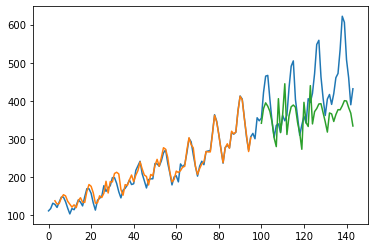




Execution (importing modules) took: 3:49:14 secs (Wall clock time)





In [13]:
import time
from datetime import timedelta

start_time = time.time()

# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs= 100, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

In [ ]:
Execution took: 3:49:14 secs (Wall clock time)

# Summary

# Next